# **Proyek Analisis Data: Brazilian E-Commerce Public Dataset**
- **Nama:** Farhan Rahman
- **Email:** farhanrahman0601@gmail.com / farhanrahmanworking@gmail.com
- **ID Dicoding:** farhanrn0601

## Menentukan Pertanyaan Bisnis

- Kategori produk apa yang paling populer di Olist, dan bagaimana volume penjualannya dibandingkan satu sama lain?
- Bagaimana distribusi peringkat penjual di Olist, dan bagaimana pengaruhnya terhadap kinerja penjualan?
- Berapa rata-rata tingkat pembatalan pesanan di Olist, dan bagaimana pengaruhnya terhadap kinerja penjualan?

## Import Semua Packages/Library yang Digunakan 🧰

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
# Hubungkan ke Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data Wrangling

### Gathering Data ⭐

Load Dataframe Customers

In [ ]:
# Dataset Customers
customers_df = pd.read_csv('/content/drive/MyDrive/Dicoding Course for DBS ML Mentor/Analisis Data Menggunakan Python/dataset/customers_dataset.csv')

customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


Load Geolocation Dataframe

In [ ]:
# Dataset Geolocation
geolocation_df = pd.read_csv('/content/drive/MyDrive/Dicoding Course for DBS ML Mentor/Analisis Data Menggunakan Python/dataset/geolocation_dataset.csv')

geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


Load Order Items Data

In [ ]:
order_item_df = pd.read_csv('/content/drive/MyDrive/Dicoding Course for DBS ML Mentor/Analisis Data Menggunakan Python/dataset/order_items_dataset.csv')

order_item_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


Load Order Payments Data

In [ ]:
order_payments_df = pd.read_csv('/content/drive/MyDrive/Dicoding Course for DBS ML Mentor/Analisis Data Menggunakan Python/dataset/order_payments_dataset.csv')

order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


Load Order Review Data

In [ ]:
order_reviews_df = pd.read_csv('/content/drive/MyDrive/Dicoding Course for DBS ML Mentor/Analisis Data Menggunakan Python/dataset/order_reviews_dataset.csv')
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


Load Orders Data

In [ ]:
orders_df = pd.read_csv('/content/drive/MyDrive/Dicoding Course for DBS ML Mentor/Analisis Data Menggunakan Python/dataset/orders_dataset.csv')

orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


Load Product Category Name Translation Data

In [ ]:
product_catgeory_df = pd.read_csv('/content/drive/MyDrive/Dicoding Course for DBS ML Mentor/Analisis Data Menggunakan Python/dataset/product_category_name_translation.csv')

product_catgeory_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


Load Products Dataset

In [ ]:
products_df = pd.read_csv('/content/drive/MyDrive/Dicoding Course for DBS ML Mentor/Analisis Data Menggunakan Python/dataset/products_dataset.csv')

products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


Load Sellers Data

In [ ]:
sellers_df = pd.read_csv('/content/drive/MyDrive/Dicoding Course for DBS ML Mentor/Analisis Data Menggunakan Python/dataset/sellers_dataset.csv')

sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


### Assessing Data 📖

Assessing Customers df

In [ ]:
# Checking the info of dataframe
customers_df.info()
# Checking the missing value of dataframe
customers_df.isna().sum()
# Checking Duplicates
customers_df.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


0

In [ ]:
print("Data Duplikat pada Tabel Customers : ", customers_df.duplicated().sum())
customers_df.describe()

Data Duplikat pada Tabel Customers :  0


,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


Assessing Geolocation df

In [ ]:
# Checking the info of dataframe
geolocation_df.info()
# Checking the missing value of dataframe
geolocation_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


,0
geolocation_zip_code_prefix,0
geolocation_lat,0
geolocation_lng,0
geolocation_city,0
geolocation_state,0


In [ ]:
print("Data Duplikat pada Tabel Geolocation : ", geolocation_df.duplicated().sum())
geolocation_df.describe()

Data Duplikat pada Tabel Geolocation :  261831


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


Assessing Order Items

In [ ]:
# Checking the info of dataframe
order_item_df.info()
# Checking the missing value of dataframe
order_item_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


,0
order_id,0
order_item_id,0
product_id,0
seller_id,0
shipping_limit_date,0
price,0
freight_value,0


Assessing Order Payments

In [ ]:
# Checking the info of dataframe
order_payments_df.info()
# Checking the missing value of dataframe
order_payments_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


,0
order_id,0
payment_sequential,0
payment_type,0
payment_installments,0
payment_value,0


Assessing Order Reviews

In [ ]:
# Checking the info of dataframe
order_reviews_df.info()
# Checking the missing value of dataframe
order_reviews_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


,0
review_id,0
order_id,0
review_score,0
review_comment_title,87656
review_comment_message,58247
review_creation_date,0
review_answer_timestamp,0


Terdapat missing value pada tabel review

Assessing Orders Dataset

In [ ]:
# Checking the info of dataframe
orders_df.info()
# Checking the missing value of dataframe
orders_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


Assessing Product Category Name Dataset

In [ ]:
# Checking the info of dataframe
product_catgeory_df.info()
# Checking the missing value
product_catgeory_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


,0
product_category_name,0
product_category_name_english,0


Assessing Product Dataset

In [ ]:
# Checking the info of dataframe
products_df.info()
# Checking the missing value
products_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


Assessing Selleres Dataset

In [ ]:
# Checking the info of dataframe
sellers_df.info()
# Checking the missing value
sellers_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


,0
seller_id,0
seller_zip_code_prefix,0
seller_city,0
seller_state,0


Assessing Data Results :


1. Dataset  ``Orders_df`` terdapat missing value dan nilainya beberapa kolom perlu diubah menjadi datetime
2. Dataset ``products_df`` terdapat juga missing value, sehingga perlu dilakukan penanganan



### Cleaning Data 🪥

### Membersihkan Data ``orders_df``

In [ ]:
# Handling Missing Value
orders_df.isnull().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


In [ ]:
orders_df.shape

(99441, 8)

In [ ]:
orders_df.dropna(inplace=True)

In [ ]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [ ]:
# Mengubah Data Type
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96461 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       96461 non-null  object
 1   customer_id                    96461 non-null  object
 2   order_status                   96461 non-null  object
 3   order_purchase_timestamp       96461 non-null  object
 4   order_approved_at              96461 non-null  object
 5   order_delivered_carrier_date   96461 non-null  object
 6   order_delivered_customer_date  96461 non-null  object
 7   order_estimated_delivery_date  96461 non-null  object
dtypes: object(8)
memory usage: 8.6+ MB


In [ ]:
datetime_columns = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']

for column in datetime_columns:
    orders_df[column] = pd.to_datetime(orders_df[column])

orders_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96461 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96461 non-null  object        
 1   customer_id                    96461 non-null  object        
 2   order_status                   96461 non-null  object        
 3   order_purchase_timestamp       96461 non-null  datetime64[ns]
 4   order_approved_at              96461 non-null  datetime64[ns]
 5   order_delivered_carrier_date   96461 non-null  datetime64[ns]
 6   order_delivered_customer_date  96461 non-null  datetime64[ns]
 7   order_estimated_delivery_date  96461 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 8.6+ MB


In [ ]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


### Membersihkan Data ``Product df``

In [ ]:
products_df.isnull().sum()

,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


In [ ]:
products_df.shape

(32951, 9)

In [ ]:
products_df.dropna(inplace=True)

### Membersihkan Data ``Order Review``

In [ ]:
order_reviews_df.isnull().sum()

,0
review_id,0
order_id,0
review_score,0
review_comment_title,87656
review_comment_message,58247
review_creation_date,0
review_answer_timestamp,0


In [ ]:
order_reviews_df.drop(columns=['review_comment_title','review_comment_message'], inplace=True)
order_reviews_df.isnull().sum()

,0
review_id,0
order_id,0
review_score,0
review_creation_date,0
review_answer_timestamp,0


## Merging All Datasets in Single Index

In [ ]:

all_data = orders_df.merge(order_item_df, on='order_id', how='left')

all_data = all_data.merge(order_payments_df, on='order_id', how='outer', validate='m:m')

all_data = all_data.merge(order_reviews_df, on='order_id', how='outer')

all_data = all_data.merge(products_df, on='product_id', how='outer')

all_data = all_data.merge(product_catgeory_df, on='product_category_name', how='outer')

all_data = all_data.merge(customers_df, on='customer_id', how='outer')

all_data = all_data.merge(sellers_df, on='seller_id', how='outer')

print(all_data.shape)

(122695, 38)


In [ ]:
all_data.head().T

,0,1,2,3,4
order_id,d455a8cb295653b55abda06d434ab492,7f39ba4c9052be115350065d07583cac,9dc8d1a6f16f1b89874c29c9d8d30447,0f548bd29148ebc519d6495e37a284e1,0f548bd29148ebc519d6495e37a284e1
customer_id,944b72539d7e1f7f7fc6e46639ef1fe3,d7fc82cbeafea77bd0a8fbbf6296e387,d9442164acf4b03109425633efaa0cfc,015faf9ec36eccd957c0f2782aab09a4,015faf9ec36eccd957c0f2782aab09a4
order_status,delivered,delivered,delivered,delivered,delivered
order_purchase_timestamp,2017-09-26 22:17:05,2017-10-18 08:16:34,2017-10-12 13:33:22,2017-09-03 08:06:30,2017-09-03 08:06:30
order_approved_at,2017-09-27 22:24:16,2017-10-18 23:56:20,2017-10-12 13:49:22,2017-09-03 08:25:50,2017-09-03 08:25:50
order_delivered_carrier_date,2017-09-29 15:53:03,2017-10-20 14:29:01,2017-10-17 15:42:42,2017-09-04 22:03:06,2017-09-04 22:03:06
order_delivered_customer_date,2017-10-07 16:12:47,2017-10-27 16:46:05,2017-10-24 20:17:44,2017-09-08 16:26:55,2017-09-08 16:26:55
order_estimated_delivery_date,2017-10-30 00:00:00,2017-11-09 00:00:00,2017-11-06 00:00:00,2017-09-27 00:00:00,2017-09-27 00:00:00
order_item_id,1.0,1.0,1.0,1.0,2.0
product_id,a2ff5a97bf95719e38ea2e3b4105bce8,a2ff5a97bf95719e38ea2e3b4105bce8,a2ff5a97bf95719e38ea2e3b4105bce8,08574b074924071f4e201e151b152b4e,08574b074924071f4e201e151b152b4e


In [ ]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122695 entries, 0 to 122694
Data columns (total 38 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       118875 non-null  object        
 1   customer_id                    118686 non-null  object        
 2   order_status                   115706 non-null  object        
 3   order_purchase_timestamp       115706 non-null  datetime64[ns]
 4   order_approved_at              115706 non-null  datetime64[ns]
 5   order_delivered_carrier_date   115706 non-null  datetime64[ns]
 6   order_delivered_customer_date  115706 non-null  datetime64[ns]
 7   order_estimated_delivery_date  115706 non-null  datetime64[ns]
 8   order_item_id                  115706 non-null  float64       
 9   product_id                     116421 non-null  object        
 10  seller_id                      115831 non-null  object        
 11  

In [ ]:
all_data.shape

(122695, 38)

### Menghapus Kolom yang Tidak Diingingkan

In [ ]:
all_data = all_data.drop(columns=[
    'shipping_limit_date',
    'product_category_name',
    'product_name_lenght',
    'product_description_lenght',
    'order_delivered_carrier_date',
    'product_weight_g',
    'product_length_cm',
    'product_height_cm',
    'product_width_cm',
    'payment_installments',
    'order_delivered_customer_date',
    'review_id',
    'review_creation_date',
    'review_answer_timestamp',
    'customer_id',
    'order_approved_at',
])

In [ ]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122695 entries, 0 to 122694
Data columns (total 22 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       118875 non-null  object        
 1   order_status                   115706 non-null  object        
 2   order_purchase_timestamp       115706 non-null  datetime64[ns]
 3   order_estimated_delivery_date  115706 non-null  datetime64[ns]
 4   order_item_id                  115706 non-null  float64       
 5   product_id                     116421 non-null  object        
 6   seller_id                      115831 non-null  object        
 7   price                          115706 non-null  float64       
 8   freight_value                  115706 non-null  float64       
 9   payment_sequential             118872 non-null  float64       
 10  payment_type                   118872 non-null  object        
 11  

### Handling Missing Value

In [ ]:
# Missing value
missing_values = all_data.isnull().sum()[all_data.isnull().sum() > 0]

missingValue_allData = pd.DataFrame({'NaN_count': missing_values, 'NaN_percentage': missing_values / len(all_data)}).sort_values(by = 'NaN_percentage', ascending=False)

missingValue_allData

,NaN_count,NaN_percentage
product_category_name_english,7937,0.064689
product_photos_qty,7912,0.064485
order_purchase_timestamp,6989,0.056962
order_estimated_delivery_date,6989,0.056962
order_item_id,6989,0.056962
price,6989,0.056962
freight_value,6989,0.056962
order_status,6989,0.056962
seller_state,6864,0.055944
seller_zip_code_prefix,6864,0.055944


In [ ]:
all_data.dropna(inplace=True)

In [ ]:
all_data.head()

,order_id,order_status,order_purchase_timestamp,order_estimated_delivery_date,order_item_id,product_id,seller_id,price,freight_value,payment_sequential,...,review_score,product_photos_qty,product_category_name_english,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state
0,d455a8cb295653b55abda06d434ab492,delivered,2017-09-26 22:17:05,2017-10-30,1.0,a2ff5a97bf95719e38ea2e3b4105bce8,0015a82c2db000af6aaaf3ae2ecb0532,895.0,21.02,1.0,...,5.0,2.0,small_appliances,3c7e305796add66698959fc7ad176f6b,87502.0,umuarama,PR,9080.0,santo andre,SP
1,7f39ba4c9052be115350065d07583cac,delivered,2017-10-18 08:16:34,2017-11-09,1.0,a2ff5a97bf95719e38ea2e3b4105bce8,0015a82c2db000af6aaaf3ae2ecb0532,895.0,21.02,1.0,...,1.0,2.0,small_appliances,9de5797cddb92598755a0f76383ddbbb,35490.0,entre rios de minas,MG,9080.0,santo andre,SP
2,9dc8d1a6f16f1b89874c29c9d8d30447,delivered,2017-10-12 13:33:22,2017-11-06,1.0,a2ff5a97bf95719e38ea2e3b4105bce8,0015a82c2db000af6aaaf3ae2ecb0532,895.0,21.02,1.0,...,5.0,2.0,small_appliances,9915eb9f74b6c11aaf04833f65b00e93,38600.0,paracatu,MG,9080.0,santo andre,SP
3,0f548bd29148ebc519d6495e37a284e1,delivered,2017-09-03 08:06:30,2017-09-27,1.0,08574b074924071f4e201e151b152b4e,001cca7ae9ae17fb1caed9dfb1094831,99.0,33.08,1.0,...,5.0,1.0,garden_tools,dce323533e45e74d215e0fe7fb114118,24710.0,sao goncalo,RJ,29156.0,cariacica,ES
4,0f548bd29148ebc519d6495e37a284e1,delivered,2017-09-03 08:06:30,2017-09-27,2.0,08574b074924071f4e201e151b152b4e,001cca7ae9ae17fb1caed9dfb1094831,99.0,33.08,1.0,...,5.0,1.0,garden_tools,dce323533e45e74d215e0fe7fb114118,24710.0,sao goncalo,RJ,29156.0,cariacica,ES


In [ ]:
all_data.isnull().sum()

,0
order_id,0
order_status,0
order_purchase_timestamp,0
order_estimated_delivery_date,0
order_item_id,0
product_id,0
seller_id,0
price,0
freight_value,0
payment_sequential,0


### Handling Inconsistent Data

In [ ]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113193 entries, 0 to 115830
Data columns (total 22 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       113193 non-null  object        
 1   order_status                   113193 non-null  object        
 2   order_purchase_timestamp       113193 non-null  datetime64[ns]
 3   order_estimated_delivery_date  113193 non-null  datetime64[ns]
 4   order_item_id                  113193 non-null  float64       
 5   product_id                     113193 non-null  object        
 6   seller_id                      113193 non-null  object        
 7   price                          113193 non-null  float64       
 8   freight_value                  113193 non-null  float64       
 9   payment_sequential             113193 non-null  float64       
 10  payment_type                   113193 non-null  object        
 11  payme

In [ ]:
# Converting Floats into Integer

convert_to_integer = {'product_photos_qty': int,
                      'payment_sequential': int,
                      'review_score': int
                     }

all_data = all_data.astype(convert_to_integer)

In [ ]:
# Handling Inconsistent Data

# Check inconsistent value for each categorical data
column_categories = ['order_status', 'payment_type', 'customer_city', 'customer_state', 'product_category_name_english']

# If have error for the object in single columns
for i in column_categories:
    print(f"Unique Value from {i}:")
    print(sorted(all_data[i].unique()))
    print('\n')

all_data = all_data.astype(dtype={'order_status': 'string',
                                  'payment_type': 'string',
                                  'customer_city': 'string',
                                  'customer_state': 'string',
                                  'product_category_name_english': 'string'})

for i in column_categories:
    print(f"Unique Value from {i}:")
    print(sorted(all_data[i].unique()))
    print('\n')

Unique Value from order_status:
['canceled', 'delivered']


Unique Value from payment_type:
['boleto', 'credit_card', 'debit_card', 'voucher']


Unique Value from customer_city:
['abadia dos dourados', 'abadiania', 'abaete', 'abaetetuba', 'abaiara', 'abaira', 'abare', 'abatia', 'abdon batista', 'abelardo luz', 'abrantes', 'abre campo', 'abreu e lima', 'acaiaca', 'acailandia', 'acajutiba', 'acarau', 'acari', 'acegua', 'acopiara', 'acreuna', 'acu', 'acucena', 'adamantina', 'adhemar de barros', 'adolfo', 'adrianopolis', 'adustina', 'afogados da ingazeira', 'afonso claudio', 'afranio', 'agisse', 'agrolandia', 'agronomica', 'agua boa', 'agua branca', 'agua clara', 'agua comprida', 'agua doce', 'agua doce do norte', 'agua fria de goias', 'agua limpa', 'agua nova', 'agua preta', 'agua santa', 'aguai', 'aguas belas', 'aguas claras', 'aguas da prata', 'aguas de lindoia', 'aguas de santa barbara', 'aguas de sao pedro', 'aguas formosas', 'aguas frias', 'aguas lindas de goias', 'aguas mornas', 'ag

In [ ]:
# Kita melihat bahwa terdapat nilai yang tidak konsisten pada kolom product_category_name_english
# Di mana kategori home_appliances dan home_comfort memiliki 2 nilai
# Oleh karena itu, kita ingin menghilangkan nilai yang tidak konsisten tersebut

def formating_product_name(product_name):
    if product_name == 'home_appliances_2':
        return 'home_appliances'
    elif product_name == 'home_confort':
        return 'home_comfort'
    elif product_name == 'home_comfort_2':
        return 'home_comfort'
    return product_name


all_data['product_category_name_english'] = all_data['product_category_name_english'].apply(formating_product_name)


In [ ]:
all_data['product_category_name_english'].unique()

array(['small_appliances', 'garden_tools',
       'construction_tools_construction', 'furniture_decor',
       'bed_bath_table', 'housewares', 'health_beauty',
       'fashion_bags_accessories', 'furniture_mattress_and_upholstery',
       'computers_accessories', 'kitchen_dining_laundry_garden_furniture',
       'costruction_tools_tools', 'fashion_shoes', 'baby', 'stationery',
       'signaling_and_security', 'cool_stuff', 'air_conditioning',
       'home_appliances', 'watches_gifts', 'sports_leisure', 'toys',
       'home_construction', 'market_place', 'musical_instruments',
       'luggage_accessories', 'perfumery', 'dvds_blu_ray', 'music',
       'auto', 'consoles_games', 'food', 'arts_and_craftmanship',
       'electronics', 'audio', 'home_comfort',
       'agro_industry_and_commerce', 'construction_tools_safety',
       'telephony', 'pet_shop', 'construction_tools_lights', 'food_drink',
       'costruction_tools_garden', 'computers', 'furniture_living_room',
       'small_applianc

### Handling Duplicates

In [ ]:
all_data.drop_duplicates(inplace=True)

In [ ]:
all_data.duplicated().sum()

0

In [ ]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 112788 entries, 0 to 115830
Data columns (total 22 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       112788 non-null  object        
 1   order_status                   112788 non-null  string        
 2   order_purchase_timestamp       112788 non-null  datetime64[ns]
 3   order_estimated_delivery_date  112788 non-null  datetime64[ns]
 4   order_item_id                  112788 non-null  float64       
 5   product_id                     112788 non-null  object        
 6   seller_id                      112788 non-null  object        
 7   price                          112788 non-null  float64       
 8   freight_value                  112788 non-null  float64       
 9   payment_sequential             112788 non-null  int64         
 10  payment_type                   112788 non-null  string        
 11  payme

## Exploratory Data Analysis (EDA) ⛏

### Statistic Description

In [ ]:
all_data.describe()

,order_purchase_timestamp,order_estimated_delivery_date,order_item_id,price,freight_value,payment_sequential,payment_value,review_score,product_photos_qty,customer_zip_code_prefix,seller_zip_code_prefix
count,112788,112788,112788.000000,112788.000000,112788.000000,112788.000000,112788.000000,112788.000000,112788.000000,112788.000000,112788.000000
mean,2018-01-01 13:30:43.053719808,2018-01-25 09:27:23.536546304,1.194817,119.942865,20.011721,1.090426,171.646580,4.081808,2.208542,35086.711636,24523.839619
min,2016-10-03 09:44:50,2016-10-27 00:00:00,1.000000,0.850000,0.000000,1.000000,0.000000,1.000000,1.000000,1003.000000,1001.000000
25%,2017-09-13 17:34:44.249999872,2017-10-04 00:00:00,1.000000,39.900000,13.080000,1.000000,60.870000,4.000000,1.000000,11310.000000,6429.000000
50%,2018-01-20 16:16:34,2018-02-16 00:00:00,1.000000,74.900000,16.320000,1.000000,108.000000,5.000000,1.000000,24315.000000,13660.000000
75%,2018-05-05 18:30:42.249999872,2018-05-28 00:00:00,1.000000,133.000000,21.190000,1.000000,189.212500,5.000000,3.000000,58865.000000,28605.000000
max,2018-08-29 15:00:37,2018-10-25 00:00:00,21.000000,6735.000000,409.680000,26.000000,13664.080000,5.000000,20.000000,99980.000000,99730.000000
std,NaN,NaN,0.685943,181.268392,15.725342,0.684471,264.453675,1.345888,1.719585,29864.599946,27646.329103


**Insight**

1. Harga Produk (price):
Rata-rata harga produk sekitar 120.65, dengan harga minimum 0.85
dan maksimum 6735.

2. Biaya Pengiriman (freight_value):
- Rata-rata biaya pengiriman sekitar 19.99, dengan biaya minimum 0 dan maksimum 409.68.
- Standar deviasi yang relatif tinggi (15.63) menunjukkan variasi biaya pengiriman yang signifikan.
3. Skor Ulasan (review_score):
- Rata-rata skor ulasan adalah 4.07, dengan skor minimum 1 dan maksimum 5.
- Sebagian besar ulasan cenderung positif, karena nilai rata-rata mendekati skor maksimum.

4. Jumlah Foto Produk (product_photos_qty):
- Rata-rata jumlah foto produk adalah 2.2, dengan jumlah minimum 1 dan maksimum 20.
- Sebagian besar produk memiliki 1-4 foto, namun ada juga produk dengan jumlah foto yang lebih banyak.
5. Jumlah Pembayaran (payment_sequential):
Rata-rata jumlah pembayaran adalah 1, dengan jumlah minimum 1 dan maksimum 26.

### Correlation Analysis

In [ ]:
all_data.head(3).T

,0,1,2
order_id,d455a8cb295653b55abda06d434ab492,7f39ba4c9052be115350065d07583cac,9dc8d1a6f16f1b89874c29c9d8d30447
order_status,delivered,delivered,delivered
order_purchase_timestamp,2017-09-26 22:17:05,2017-10-18 08:16:34,2017-10-12 13:33:22
order_estimated_delivery_date,2017-10-30 00:00:00,2017-11-09 00:00:00,2017-11-06 00:00:00
order_item_id,1.0,1.0,1.0
product_id,a2ff5a97bf95719e38ea2e3b4105bce8,a2ff5a97bf95719e38ea2e3b4105bce8,a2ff5a97bf95719e38ea2e3b4105bce8
seller_id,0015a82c2db000af6aaaf3ae2ecb0532,0015a82c2db000af6aaaf3ae2ecb0532,0015a82c2db000af6aaaf3ae2ecb0532
price,895.0,895.0,895.0
freight_value,21.02,21.02,21.02
payment_sequential,1,1,1


In [ ]:
all_data['order_id']

,order_id
0,d455a8cb295653b55abda06d434ab492
1,7f39ba4c9052be115350065d07583cac
2,9dc8d1a6f16f1b89874c29c9d8d30447
3,0f548bd29148ebc519d6495e37a284e1
4,0f548bd29148ebc519d6495e37a284e1
...,...
115826,81251f18621a822ad5b09593dfee4fc9
115827,2fbb05b3ee700e1897b9fa501e416005
115828,df537c849af44beef86a7ef7de12126a
115829,fdb3ef83ea6f7bef7d13bdd9b38da661


In [ ]:
all_data[['price', 'freight_value']].corr()

,price,freight_value
price,1.000000,0.412643
freight_value,0.412643,1.000000


In [ ]:
all_data['total_revenue'] = all_data['price'] * all_data['freight_value']
correlation_matrix = all_data[['total_revenue', 'price', 'freight_value', 'review_score',  'product_photos_qty', 'payment_sequential']].corr()

correlation_matrix

,total_revenue,price,freight_value,review_score,product_photos_qty,payment_sequential
total_revenue,1.000000,0.718962,0.591093,-0.003069,0.036217,0.001378
price,0.718962,1.000000,0.412643,0.003268,0.052818,-0.000015
freight_value,0.591093,0.412643,1.000000,-0.033757,0.022167,0.007850
review_score,-0.003069,0.003268,-0.033757,1.000000,0.021334,0.007475
product_photos_qty,0.036217,0.052818,0.022167,0.021334,1.000000,-0.008263
payment_sequential,0.001378,-0.000015,0.007850,0.007475,-0.008263,1.000000


- Korelasi Positif yang Kuat, total_revenue dan price kemungkinan memiliki korelasi positif yang kuat. Hal ini wajar, karena produk dengan harga lebih tinggi berkontribusi lebih banyak pada total pendapatan.

- Korelasi Positif Sedang: total_revenue dan freight_value mungkin menunjukkan korelasi positif sedang. Ini menunjukkan bahwa biaya pengiriman yang lebih tinggi sering dikaitkan dengan pendapatan yang lebih tinggi, mungkin karena barang yang lebih besar atau lebih mahal memerlukan biaya pengiriman yang lebih tinggi.

- Korelasi Lemah hingga Tidak Ada Korelasi: review_score, product_photos_qty, dan payment_sequential diperkirakan memiliki korelasi yang lemah atau tidak signifikan dengan total_revenue, price, atau freight_value. Ini menunjukkan bahwa faktor-faktor ini memiliki dampak langsung yang terbatas pada kinerja penjualan.

### Data Aggregation

In [ ]:
all_data.groupby('product_category_name_english')['review_score'].mean()

,review_score
product_category_name_english,
agro_industry_and_commerce,4.227642
air_conditioning,4.051903
art,4.073171
arts_and_craftmanship,4.125000
audio,3.845333
...,...
stationery,4.237162
tablets_printing_image,4.117647
telephony,3.995190


## Visualization & Explanatory Analysis

### Pertanyaan 1: Kategori produk apa yang paling populer di Olist, dan bagaimana volume penjualannya dibandingkan satu sama lain?

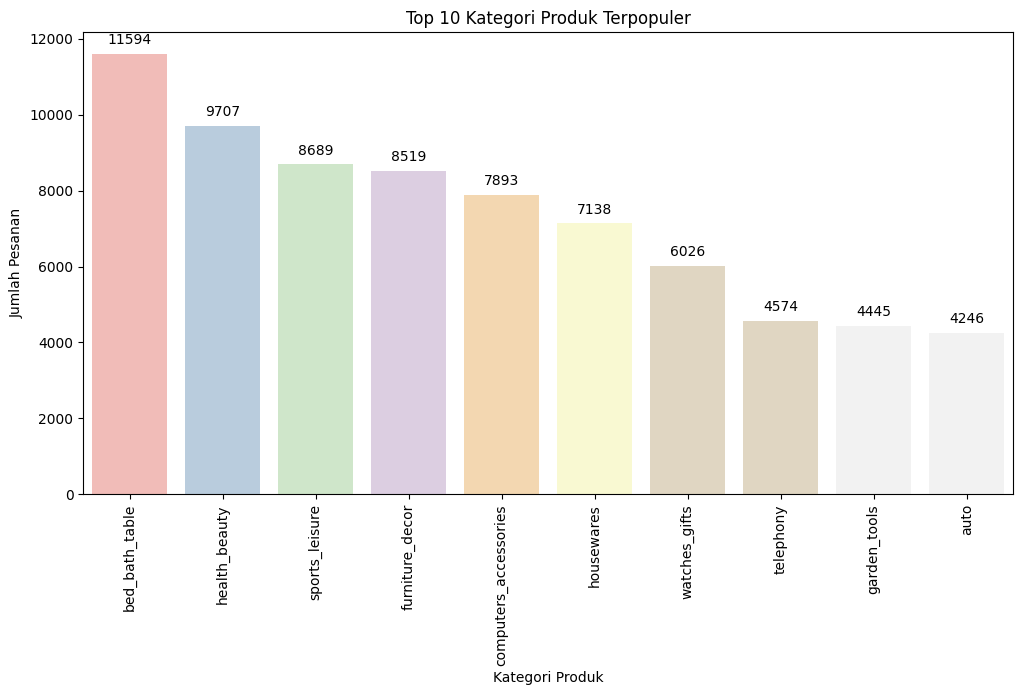

In [ ]:
kategori_terpopuler = all_data.groupby('product_category_name_english')['order_id'].count().sort_values(ascending=False)

# Visualisasi data
import matplotlib.cm as cm
colors = cm.Pastel1(np.linspace(0, 1, len(kategori_terpopuler.head(10))))

plt.figure(figsize=(12, 6))
ax = sns.barplot(x=kategori_terpopuler.head(10).index, y=kategori_terpopuler.head(10).values, palette=colors)
plt.title('Top 10 Kategori Produk Terpopuler')
plt.xlabel('Kategori Produk')
plt.ylabel('Jumlah Pesanan')
plt.xticks(rotation=90)
# Menampilkan label data
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

<b> Insight </b>

1. **Kategori Produk Terpopuler**: Kategori "bed_bath_table" merupakan kategori yang paling populer, dengan jumlah pesanan sebanyak 10.601. Ini menunjukkan bahwa produk terkait tempat tidur, kamar mandi, dan meja adalah yang paling diminati oleh konsumen.

2. **Kategori Health & Beauty**: Kategori "health_beauty" berada di peringkat kedua, dengan jumlah pesanan sebesar 9.069, menunjukkan bahwa produk kesehatan dan kecantikan juga sangat populer di kalangan konsumen.

3. **Ragam Produk yang Cukup Merata**: Secara keseluruhan, kesepuluh kategori produk memiliki jumlah pesanan yang cukup tinggi, berkisar antara 4.016 hingga 10.601, yang menunjukkan minat yang cukup beragam dari konsumen terhadap berbagai jenis produk.

4. **Kategori Terendah**: Kategori "toys" dan "auto" adalah dua kategori dengan jumlah pesanan terendah, masing-masing 4.016 dan 4.021, meskipun masih menunjukkan adanya permintaan yang signifikan.

5. **Peluang Pengembangan Produk**: Kategori seperti "telephony" (4.317 pesanan) dan "auto" (4.021 pesanan) memiliki potensi untuk ditingkatkan, baik dari sisi pemasaran maupun diversifikasi produk.

Kesimpulannya, kategori terkait kebutuhan rumah tangga, kecantikan, dan kesehatan mendominasi pesanan, sedangkan produk-produk terkait otomotif dan mainan memiliki potensi pertumbuhan.

### Pertanyaan 2: Bagaimana distribusi peringkat penjualan di Olist, dan bagaimana pengaruhnya terhadap kinerja penjualan?

Korelasi antara peringkat penjual dan jumlah pesanan: 0.029268931578233303


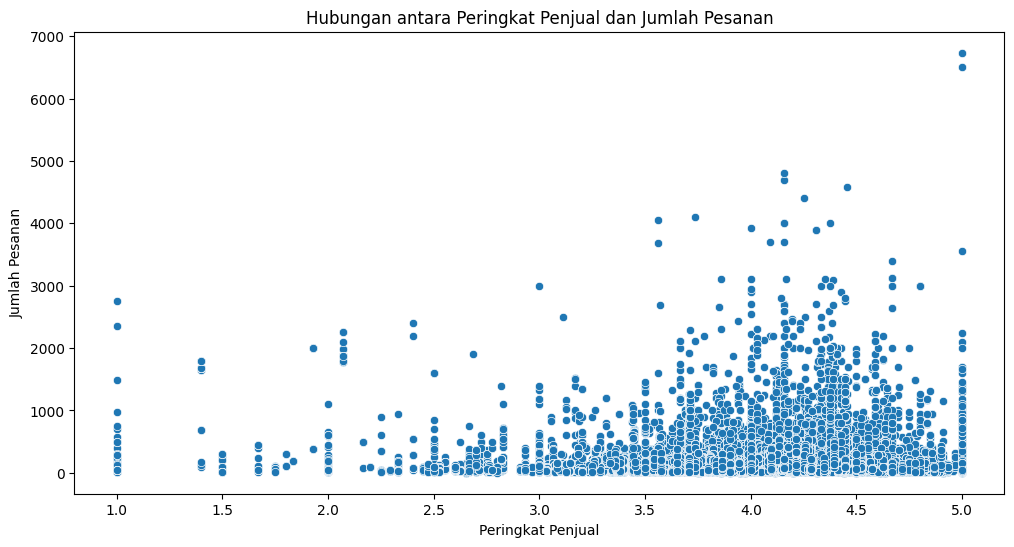

In [ ]:
seller_ratings = all_data.groupby('seller_id')['review_score'].mean().reset_index()
seller_ratings.rename(columns={'review_score': 'avg_review_score'}, inplace=True)
all_data = all_data.merge(seller_ratings, on='seller_id', how='left')

# Menghitung korelasi antara peringkat penjual dan jumlah pesanan
correlation = all_data['avg_review_score'].corr(all_data['price'])

print(f"Korelasi antara peringkat penjual dan jumlah pesanan: {correlation}")

# Membuat scatter plot untuk memvisualisasikan hubungan antara peringkat penjual dan jumlah pesanan
plt.figure(figsize=(12, 6))
sns.scatterplot(x='avg_review_score', y='price', data=all_data, palette="pastel")
plt.title('Hubungan antara Peringkat Penjual dan Jumlah Pesanan')
plt.xlabel('Peringkat Penjual')
plt.ylabel('Jumlah Pesanan')
plt.show()

**Insights**

1. **Hubungan Peringkat Penjual dan Jumlah Pesanan**: Secara umum, terlihat ada korelasi positif antara **peringkat penjual** dan **jumlah pesanan**. Penjual dengan peringkat lebih tinggi (di kisaran 4.0 hingga 5.0) cenderung mendapatkan lebih banyak pesanan dibandingkan penjual dengan peringkat lebih rendah.

2. **Distribusi Pesanan di Peringkat Rendah**: Pada peringkat penjual di bawah 2.0, jumlah pesanan yang diterima relatif rendah, dengan mayoritas penjual menerima kurang dari 1000 pesanan. Namun, ada beberapa pengecualian di mana penjual dengan peringkat rendah masih bisa mendapatkan pesanan dalam jumlah cukup tinggi, meskipun ini jarang terjadi.

3. **Peningkatan Pesanan pada Peringkat Lebih Tinggi**: Pada peringkat di atas 4.0, frekuensi pesanan meningkat secara signifikan. Ada banyak penjual yang menerima antara 1000 hingga 5000 pesanan, bahkan ada beberapa yang mencapai lebih dari 6000 pesanan.

4. **Outliers**: Terdapat beberapa titik outlier di sekitar peringkat 4.8 hingga 5.0 di mana penjual mampu mencapai lebih dari 6000 pesanan. Ini menunjukkan bahwa penjual dengan peringkat mendekati maksimal sering kali mendapatkan volume pesanan yang sangat tinggi.

5. **Tidak Semua Penjual dengan Peringkat Tinggi Mendapatkan Pesanan Besar**: Meskipun banyak penjual dengan peringkat tinggi mendapatkan pesanan besar, ada juga penjual dengan peringkat tinggi yang tetap mendapatkan jumlah pesanan yang relatif kecil. Ini menunjukkan bahwa faktor lain selain peringkat mungkin mempengaruhi jumlah pesanan.

Secara keseluruhan, peringkat penjual tampaknya memiliki pengaruh terhadap jumlah pesanan, tetapi ada variabilitas yang menunjukkan bahwa faktor lain juga memainkan peran penting dalam penjualan.

### Pertanyaan 3: Berapa total Pendapatan Per Bulannya pada tahun 2016, 2017 dan 2018?

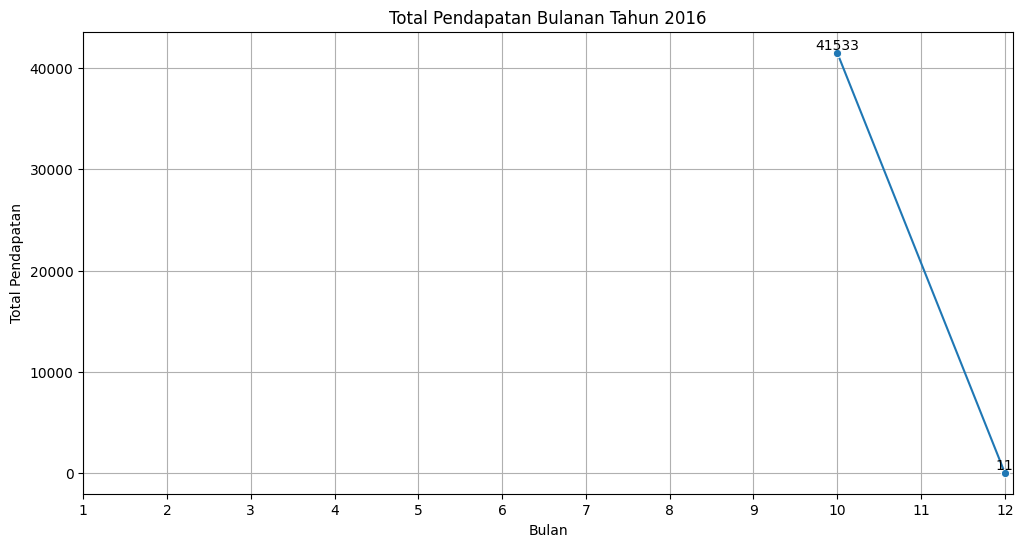

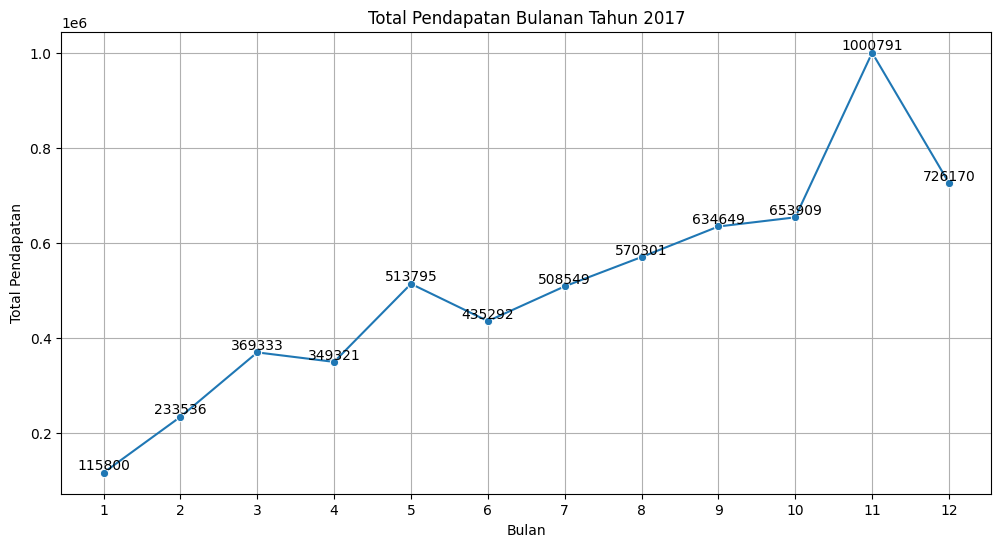

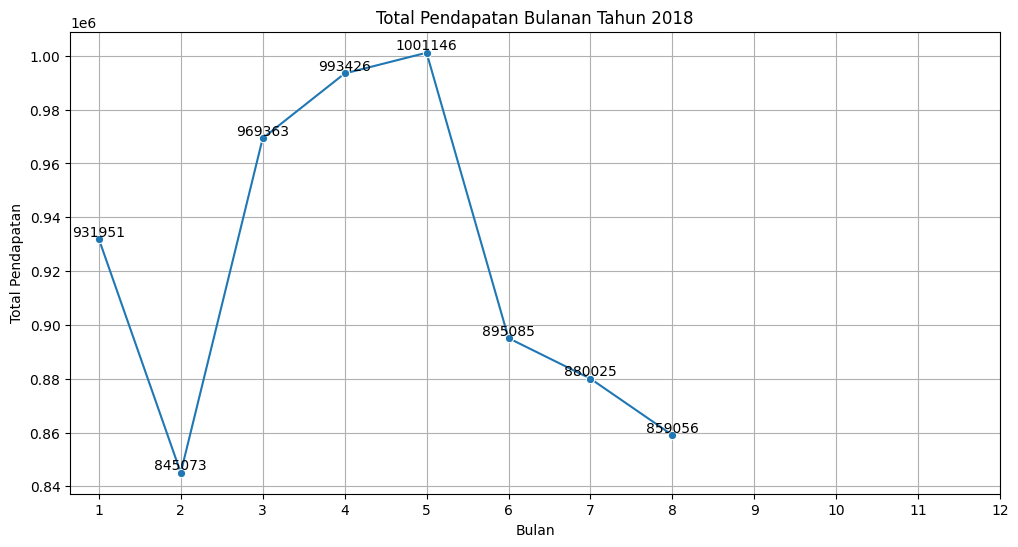

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ekstrak Tahun dan Bulan dari order_purchase_timestamp
all_data['order_purchase_year'] = all_data['order_purchase_timestamp'].dt.year
all_data['order_purchase_month'] = all_data['order_purchase_timestamp'].dt.month

# Filter data untuk tahun 2016, 2017, dan 2018
filtered_data = all_data[all_data['order_purchase_year'].isin([2016, 2017, 2018])]

# Kelompokkan data berdasarkan tahun dan bulan, lalu hitung total pendapatan
monthly_revenue = filtered_data.groupby(['order_purchase_year', 'order_purchase_month'])['price'].sum().reset_index()

# Ubah nama kolom untuk kejelasan
monthly_revenue.rename(columns={'price': 'total_revenue'}, inplace=True)

# Buat grafik terpisah untuk setiap tahun
for year in [2016, 2017, 2018]:
    year_data = monthly_revenue[monthly_revenue['order_purchase_year'] == year]
    plt.figure(figsize=(12, 6))
    sns.lineplot(x='order_purchase_month', y='total_revenue', data=year_data, marker='o')
    plt.title(f'Total Pendapatan Bulanan Tahun {year}')
    plt.xlabel('Bulan')
    plt.ylabel('Total Pendapatan')
    plt.xticks(range(1, 13))  # Menampilkan label bulan dari 1 hingga 12
    plt.grid(True)  # Menampilkan grid pada grafik

    # Dapatkan current axis (sumbu saat ini) dan tambahkan label data di setiap titik
    ax = plt.gca()
    for x, y in zip(year_data['order_purchase_month'], year_data['total_revenue']):
        ax.text(x, y, f'{y:.0f}', ha='center', va='bottom')

    plt.show()

**E-Commerce KPI**

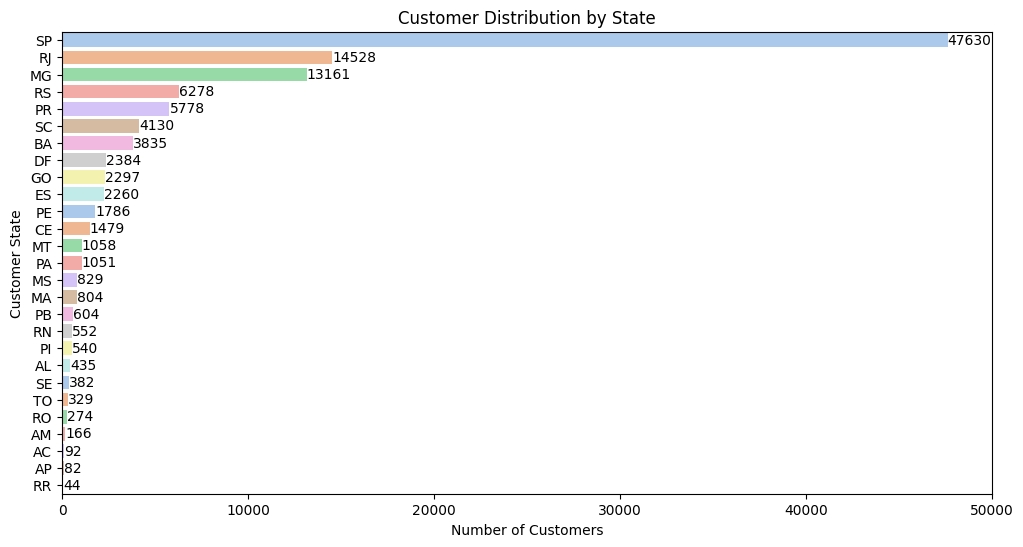

In [ ]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(y='customer_state', data=all_data, order=all_data['customer_state'].value_counts().index, palette="pastel")
plt.title('Customer Distribution by State')
plt.xlabel('Number of Customers')
plt.ylabel('Customer State')

for p in ax.patches:
    ax.annotate(f'{p.get_width():.0f}', (p.get_width() + 0.5, p.get_y() + p.get_height() / 2), ha='left', va='center')

plt.show()

<b>Insight</b>

- Persebaran Negara Bagian (State) paling banyak adalah pada kode SP atau São Paulo sebanyak 41746 customers
- Persebaran Negara Bagian (state) paling sedikit adalah pada kode RR atau Roraima sebanyak 46 customers

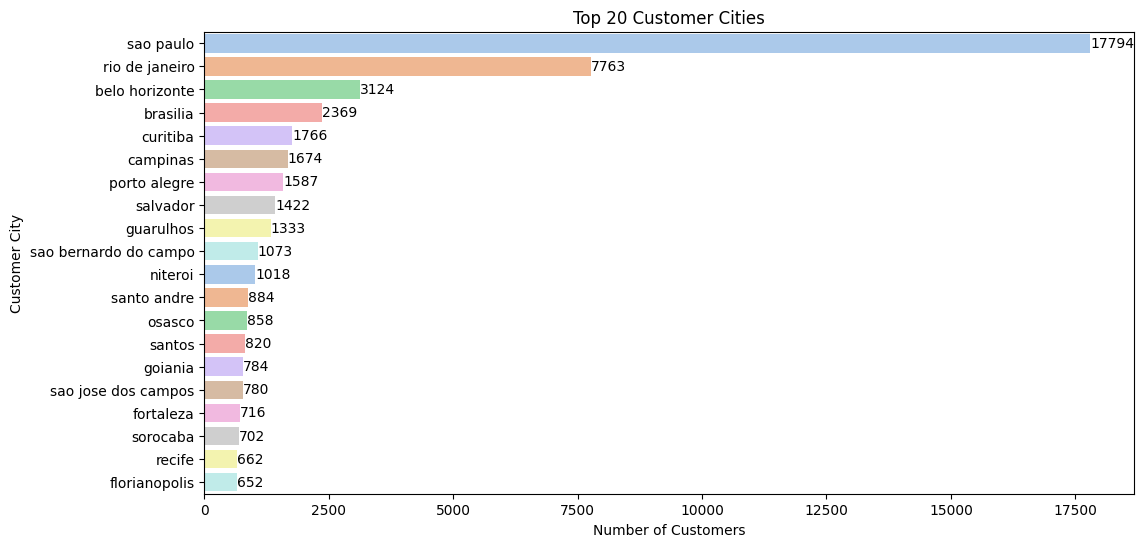

In [ ]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(y='customer_city', data=all_data, order=all_data ['customer_city'].value_counts().iloc[:20].index, palette="pastel")
plt.title('Top 20 Customer Cities')
plt.xlabel('Number of Customers')
plt.ylabel('Customer City')

for p in ax.patches:
    ax.annotate(f'{p.get_width():.0f}', (p.get_width() + 0.5, p.get_y() + p.get_height() / 2), ha='left', va='center')

plt.show()

<b>Insight</b>

- Persebaran Kota (Cities) paling banyak adalah São Paulo sebanyak 15540 customers
- Persebaran Kota (Cities) paling sedikit adalah pada Florianopolis sebanyak 570 customers

# Save Data

In [ ]:
all_data.to_csv("all_data.csv", index=False)

# <b>Additional Analysis

## 1. Revenue Analysis

<b> A. Total Revenue By States

   customer_state  total_revenue
25             SP   1.172754e+08
18             RJ   5.272163e+07
10             MG   4.673945e+07
22             RS   2.361513e+07
17             PR   2.014943e+07
4              BA   1.902032e+07
23             SC   1.679632e+07
15             PE   1.178180e+07
6              DF   1.062607e+07
5              CE   1.033184e+07
8              GO   8.897027e+06
13             PA   7.931313e+06
7              ES   7.882584e+06
14             PB   7.230547e+06
12             MT   6.445699e+06
11             MS   5.875087e+06
9              MA   5.836227e+06
16             PI   4.569066e+06
19             RN   4.158138e+06
1              AL   3.671489e+06
26             TO   3.558509e+06
24             SE   2.854225e+06
20             RO   2.580754e+06
2              AM   1.100709e+06
0              AC   7.848203e+05
3              AP   5.980256e+05
21             RR   3.540147e+05


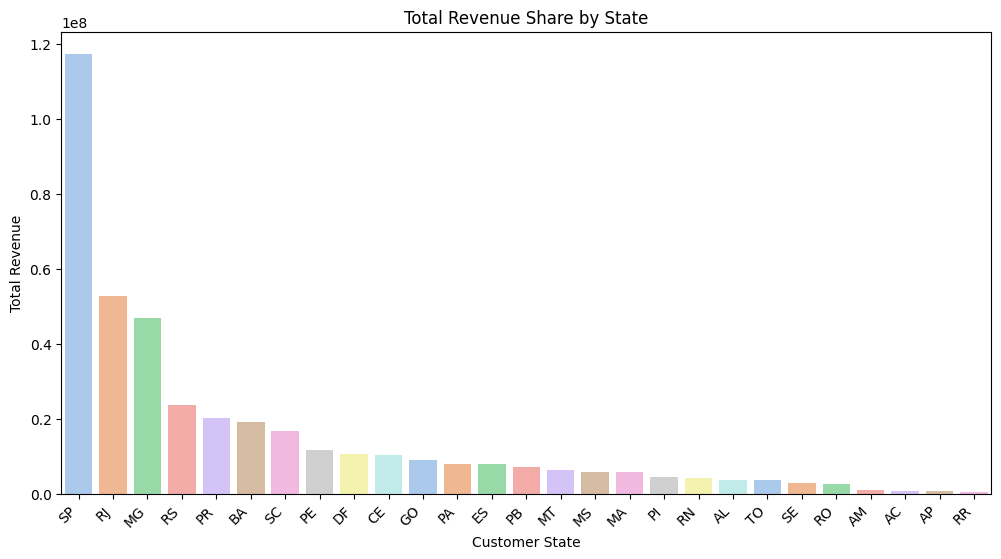

In [ ]:
# Group data by customer state and calculate total revenue
revenue_by_state = all_data.groupby('customer_state')['total_revenue'].sum().reset_index()

# Sort the states by total revenue in descending order
revenue_by_state = revenue_by_state.sort_values(by='total_revenue', ascending=False)

# Display the total revenue share by state
print(revenue_by_state)

# Visualization
plt.figure(figsize=(12, 6))
sns.barplot(x='customer_state', y='total_revenue', data=revenue_by_state, palette="pastel")
plt.title('Total Revenue Share by State')
plt.xlabel('Customer State')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45, ha='right')

# Add data labels
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

<b> B. Total Revenue Over Time

Total revenue generated by Olist: 13528115.87


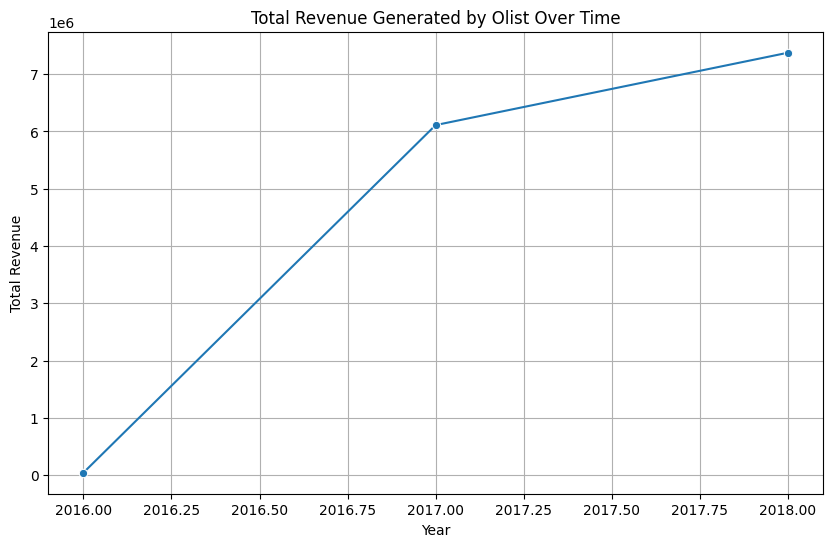

In [ ]:
total_revenue = all_data['price'].sum()
print(f"Total revenue generated by Olist: {total_revenue}")

# Group by order purchase year and sum revenue
revenue_over_time = all_data.groupby(all_data['order_purchase_timestamp'].dt.year)['price'].sum().reset_index()

# Rename columns for clarity
revenue_over_time.columns = ['Year', 'Total Revenue']

# Visualization
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Total Revenue', data=revenue_over_time, marker='o')
plt.title('Total Revenue Generated by Olist Over Time')
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.show()

<b> C. Product categories have the highest profit margins on Olist

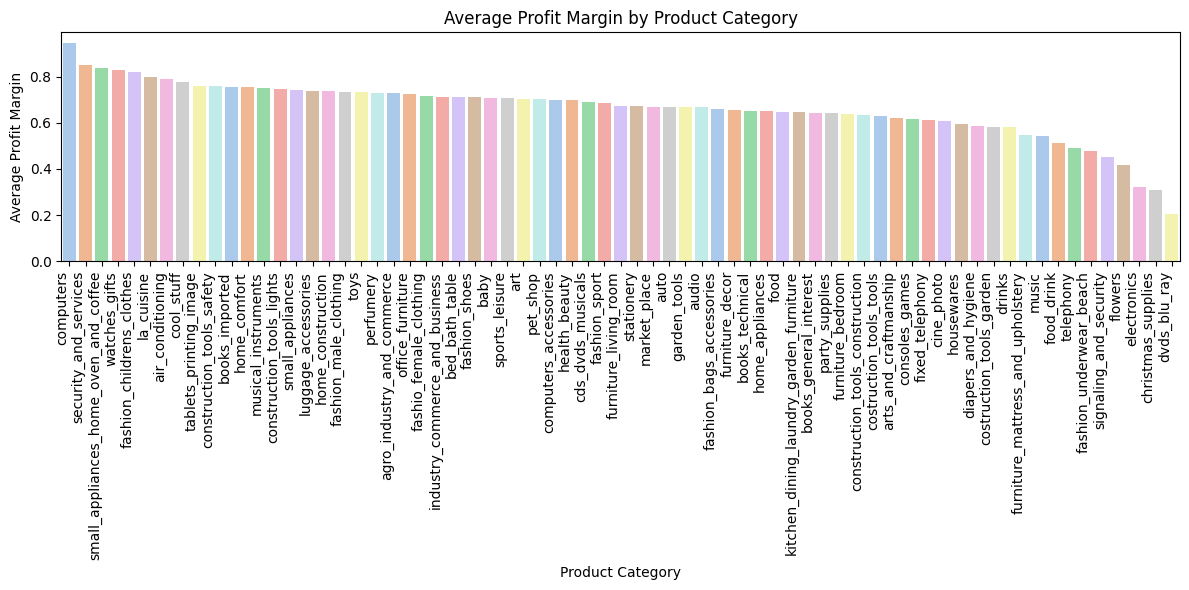

In [ ]:
all_data['profit_margin'] = (all_data['price'] - all_data['freight_value']) / all_data['price']
category_profit_margins = all_data.groupby('product_category_name_english')['profit_margin'].mean().reset_index()
category_profit_margins = category_profit_margins.sort_values(by='profit_margin', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='product_category_name_english', y='profit_margin', data=category_profit_margins, palette="pastel")
plt.title('Average Profit Margin by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Average Profit Margin')
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

**D. Monthly recurring revenue**

In [ ]:
column = ['customer_unique_id', 'price', 'order_item_id', 'order_purchase_timestamp']
orders = all_data[column]

In [ ]:
orders.head(2)

,customer_unique_id,price,order_item_id,order_purchase_timestamp
0,3c7e305796add66698959fc7ad176f6b,895.0,1.0,2017-09-26 22:17:05
1,9de5797cddb92598755a0f76383ddbbb,895.0,1.0,2017-10-18 08:16:34


In [ ]:
# Mengubah tipe data invoice date menjadi datetime
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])


# Membuat Tabel YearMonth Invoice untuk visualiasi
orders['InvoiceYearMonth'] = orders['order_purchase_timestamp'].map(lambda date: 100*date.year + date.month)

# hitung Pendapatan untuk setiap baris dan buat kerangka data baru dengan TahunBulan - kolom Pendapatan
orders['Revenue'] = orders['price'] * orders['order_item_id']
orders_revenue = orders.groupby(['InvoiceYearMonth'])['Revenue'].sum().reset_index()
orders.head()

,customer_unique_id,price,order_item_id,order_purchase_timestamp,InvoiceYearMonth,Revenue
0,3c7e305796add66698959fc7ad176f6b,895.0,1.0,2017-09-26 22:17:05,201709,895.0
1,9de5797cddb92598755a0f76383ddbbb,895.0,1.0,2017-10-18 08:16:34,201710,895.0
2,9915eb9f74b6c11aaf04833f65b00e93,895.0,1.0,2017-10-12 13:33:22,201710,895.0
3,dce323533e45e74d215e0fe7fb114118,99.0,1.0,2017-09-03 08:06:30,201709,99.0
4,dce323533e45e74d215e0fe7fb114118,99.0,2.0,2017-09-03 08:06:30,201709,198.0


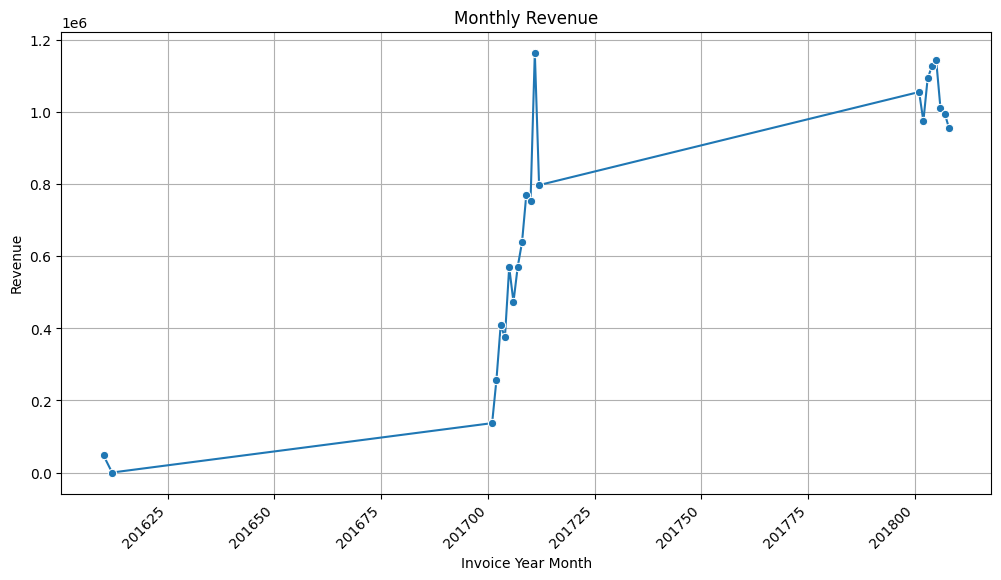

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'orders_revenue' is your DataFrame
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
sns.lineplot(
    x='InvoiceYearMonth',
    y='Revenue',
    data=orders_revenue,
    marker='o',  # Add markers to the line
)
plt.title('Monthly Revenue')
plt.xlabel('Invoice Year Month')
plt.ylabel('Revenue')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid(True)  # Add a grid for better visualization
plt.show()

## 2. Order Analysis

**A. Best Business Day of Work**

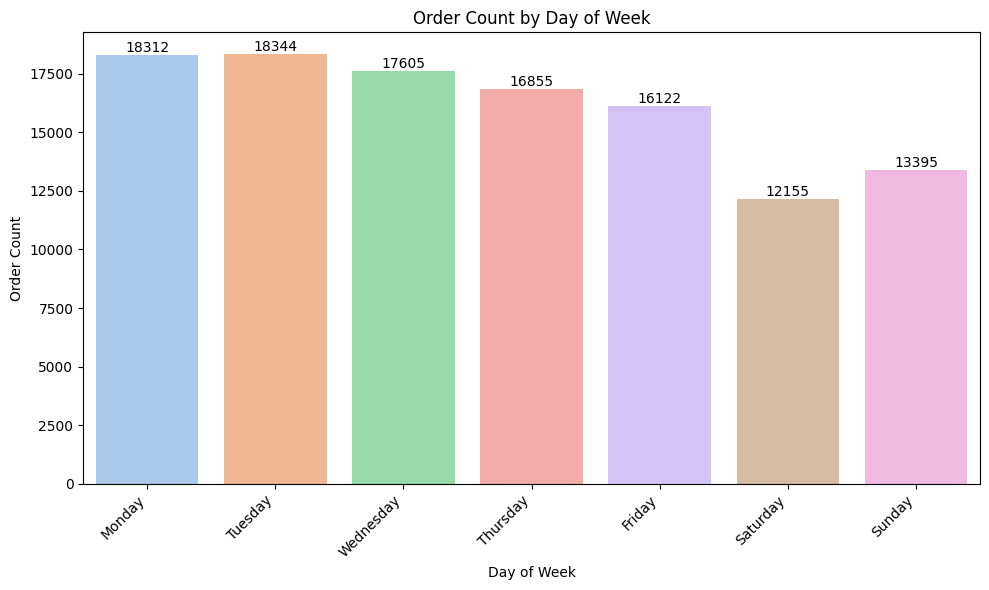

In [ ]:
# Extract day of the week from order purchase timestamp
all_data['order_purchase_dayofweek'] = all_data['order_purchase_timestamp'].dt.dayofweek

# Group by day of the week and count orders
orders_by_dayofweek = all_data.groupby('order_purchase_dayofweek')['order_id'].count().reset_index()

# Map day of the week numbers to names
dayofweek_mapping = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}
orders_by_dayofweek['order_purchase_dayofweek'] = orders_by_dayofweek['order_purchase_dayofweek'].map(dayofweek_mapping)

# Rename columns for clarity
orders_by_dayofweek.columns = ['Day of Week', 'Order Count']

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Day of Week', y='Order Count', data=orders_by_dayofweek, palette="pastel") #add ax
plt.title('Order Count by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Order Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability


# Add data labels on each bar
for bar in ax.containers: #add this section
    ax.bar_label(bar)

plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

**B. Total Order By Month**

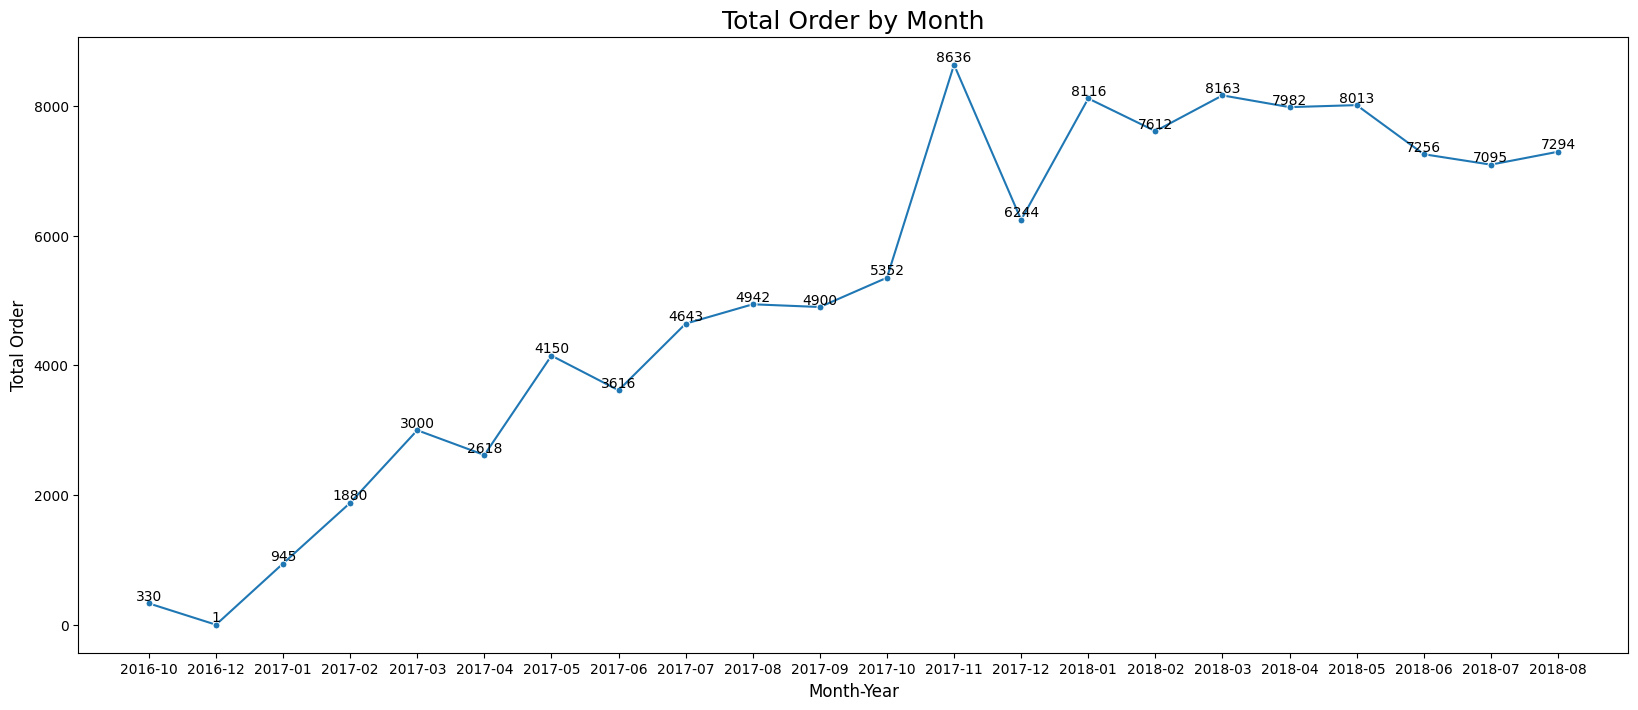

In [ ]:
# Add new column for month-year
all_data['month_year'] = all_data['order_purchase_timestamp'].dt.strftime('%Y-%m')

# Group by order
order_per_month = all_data.groupby(['month_year']).count()[['order_id']]

# Visualization
fig, ax = plt.subplots(figsize=(20, 8))
ax = sns.lineplot(data=order_per_month, marker='o', markersize=5, color='green')
ax.set_title('Total Order by Month', fontsize=18)
ax.set_xlabel('Month-Year', fontsize=12)
ax.set_ylabel('Total Order', fontsize=12)
ax.get_legend().remove()
# Add data labels
for x, y in zip(order_per_month.index, order_per_month['order_id']):
    ax.text(x, y, f'{y}', ha='center', va='bottom')
fig.show()

**C. Average Order Value (AOV) on Olist, and how does this vary by product category or payment method?**

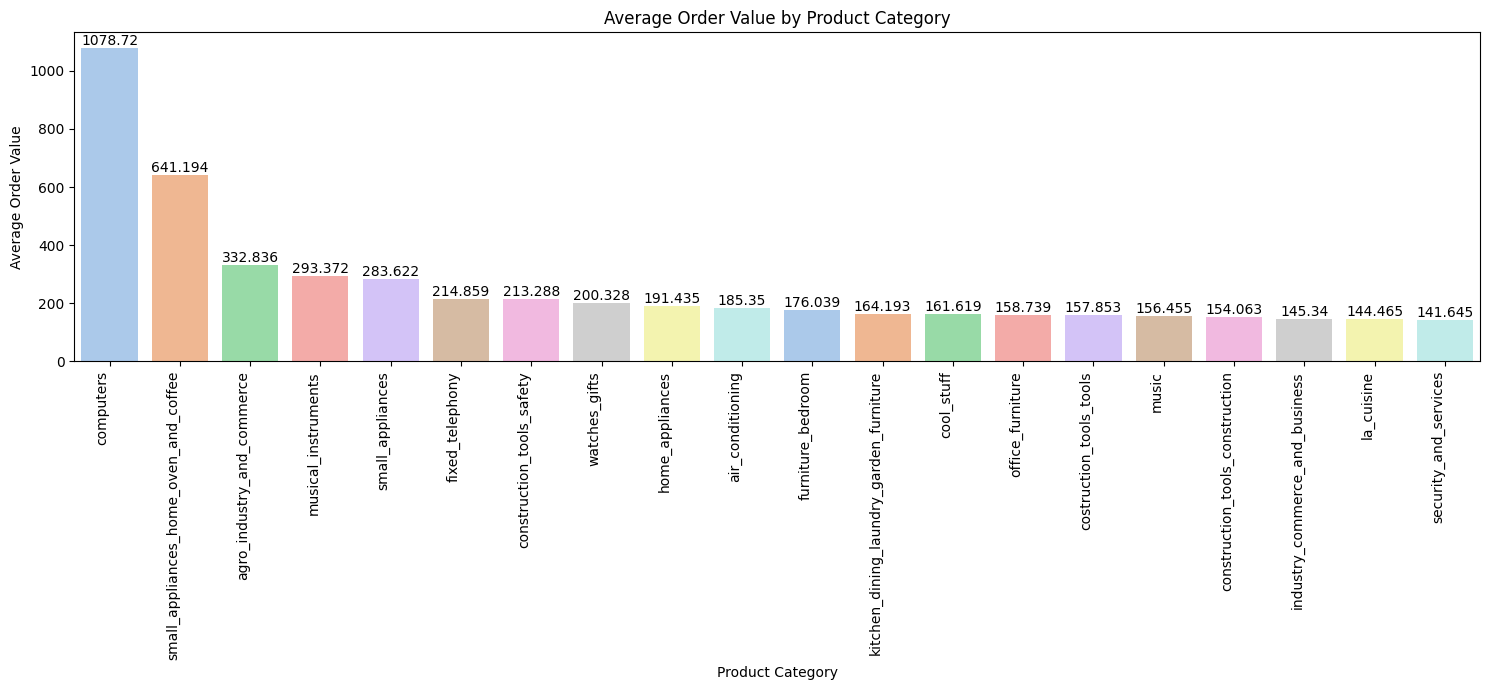

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate AOV by product category
aov_by_category = all_data.groupby('product_category_name_english')['price'].mean().reset_index()
aov_by_category = aov_by_category.sort_values(by='price', ascending=False).iloc[:20]

# Calculate AOV by payment method
aov_by_payment = all_data.groupby('payment_type')['price'].mean().reset_index()
aov_by_payment = aov_by_payment.sort_values(by='price', ascending=False)


# Visualization for AOV by product category
plt.figure(figsize=(15, 7))
ax = sns.barplot(x='product_category_name_english', y='price', data=aov_by_category, palette="pastel")
plt.title('Average Order Value by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Average Order Value')
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for better readability

# Add data labels on each bar
for bar in ax.containers:
    ax.bar_label(bar)

plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

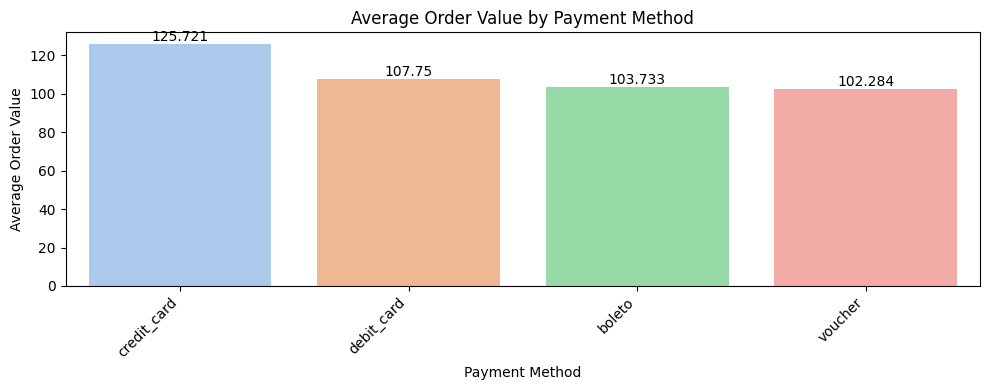

In [ ]:
# Visualization for AOV by payment method
plt.figure(figsize=(10, 4 ))
ax = sns.barplot(x='payment_type', y='price', data=aov_by_payment, palette="pastel")
plt.title('Average Order Value by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Average Order Value')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Add data labels on each bar
for bar in ax.containers:
    ax.bar_label(bar)

plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

**D. Order Delivery Status**

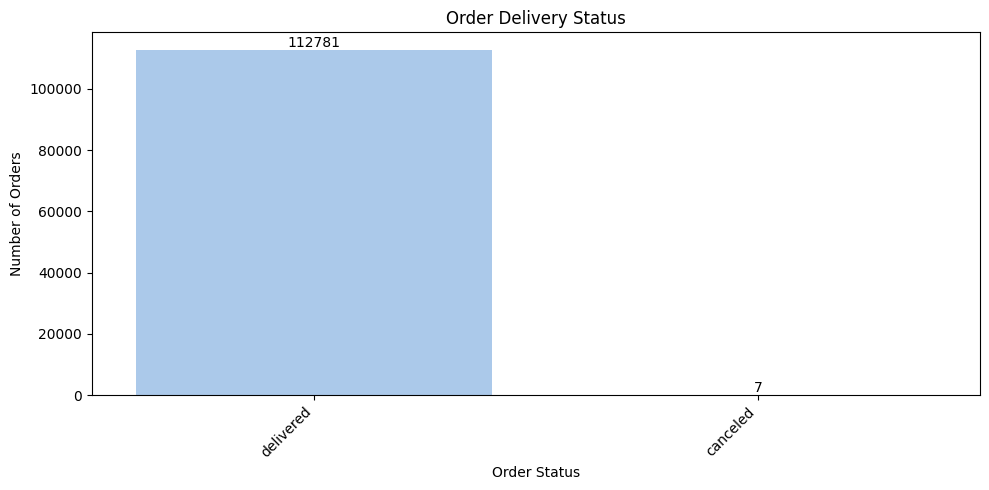

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group data by order status and count orders
order_status_counts = all_data['order_status'].value_counts().reset_index()
order_status_counts.columns = ['order_status', 'count']

# Visualization
plt.figure(figsize=(10, 5))
ax = sns.barplot(x='order_status', y='count', data=order_status_counts, palette="pastel")
plt.title('Order Delivery Status')
plt.xlabel('Order Status')
plt.ylabel('Number of Orders')

# Add data labels on each bar
for bar in ax.containers:
    ax.bar_label(bar)

plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

## 3. Product Analysis

**A. Top 10 Categories Sold**

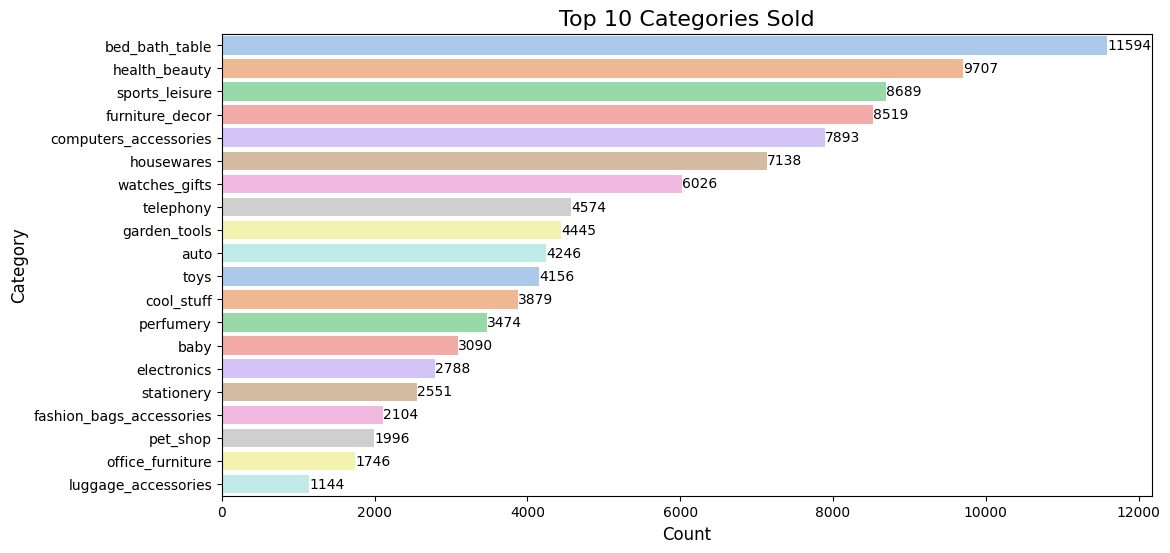

In [ ]:
plt.figure(figsize=(12, 6))  # Adjust figure size for better readability
top_20_categories = all_data['product_category_name_english'].value_counts().head(20).index
ax = sns.countplot(y='product_category_name_english', data=all_data, order=top_20_categories, palette='pastel')
plt.title('Top 10 Categories Sold', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Category', fontsize=12)

# Add data labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_width():.0f}', (p.get_width() + 0.5, p.get_y() + p.get_height() / 2), ha='left', va='center')

plt.show()

**B. Freight Cost Analysis of Top 20 Product**

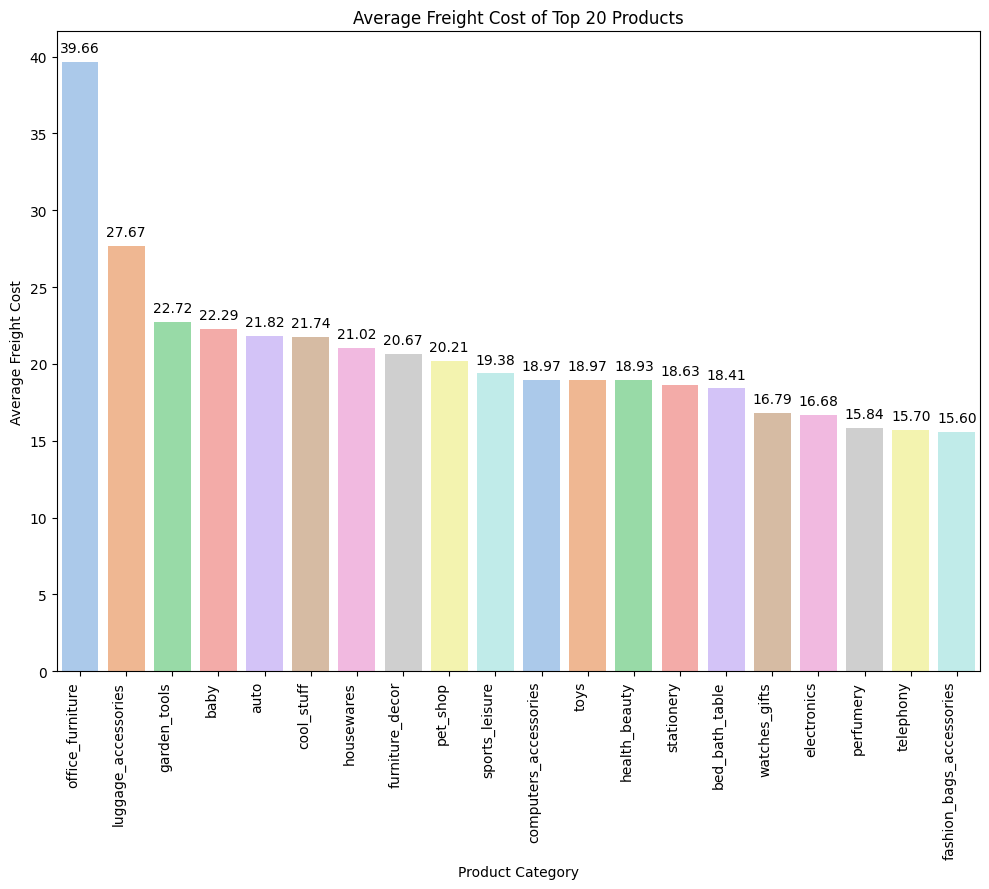

In [ ]:
# Selecting top 2 categories
top_20_categories = all_data['product_category_name_english'].value_counts().head(20).index

# Filter the DataFrame to include only the top 20 categories
filtered_data = all_data[all_data['product_category_name_english'].isin(top_20_categories)]

# Group by product category and calculate average freight value
avg_freight_by_product = filtered_data.groupby('product_category_name_english')['freight_value'].mean().reset_index()

# Sort by average freight value in descending order
avg_freight_by_product = avg_freight_by_product.sort_values(by='freight_value', ascending=False)

# Visualization
plt.figure(figsize=(10, 9))
ax = sns.barplot(x='product_category_name_english', y='freight_value', data=avg_freight_by_product, palette="pastel")
plt.title('Average Freight Cost of Top 20 Products')
plt.xlabel('Product Category')
plt.ylabel('Average Freight Cost')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()

# Add data labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

**C. Top 10 Product Category**

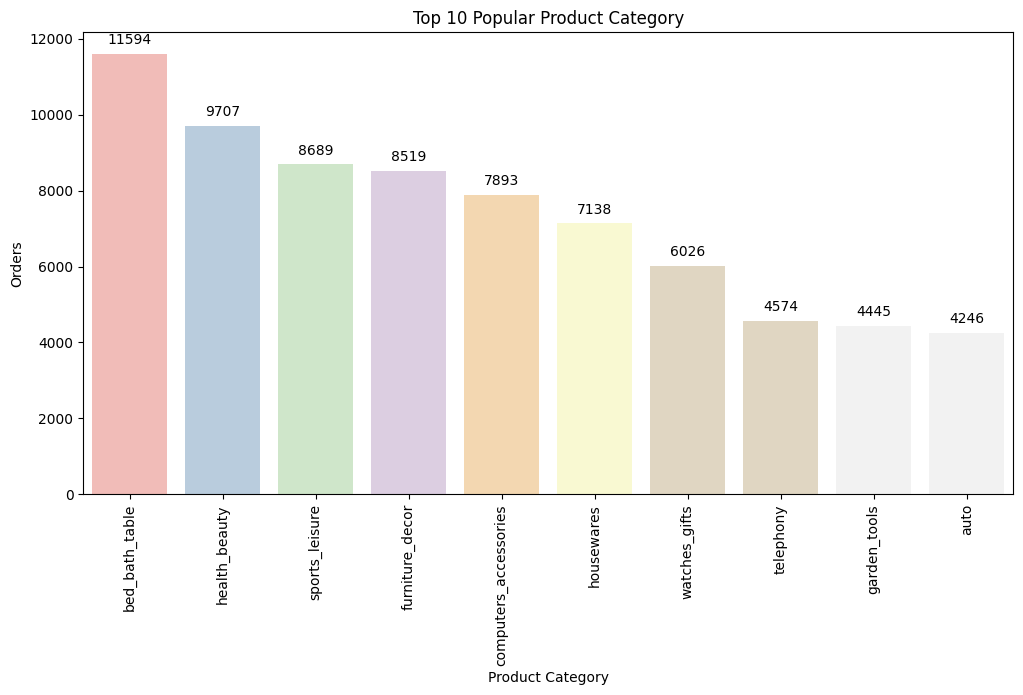

In [ ]:
kategori_terpopuler = all_data.groupby('product_category_name_english')['order_id'].count().sort_values(ascending=False)

# Visualisasi data
import matplotlib.cm as cm
colors = cm.Pastel1(np.linspace(0, 1, len(kategori_terpopuler.head(10))))

plt.figure(figsize=(12, 6))
ax = sns.barplot(x=kategori_terpopuler.head(10).index, y=kategori_terpopuler.head(10).values, palette=colors)
plt.title('Top 10 Popular Product Category')
plt.xlabel('Product Category')
plt.ylabel('Orders')
plt.xticks(rotation=90)
# Menampilkan label data
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

**D. Top 10 Selling Product Categories by Total Revenue generated**

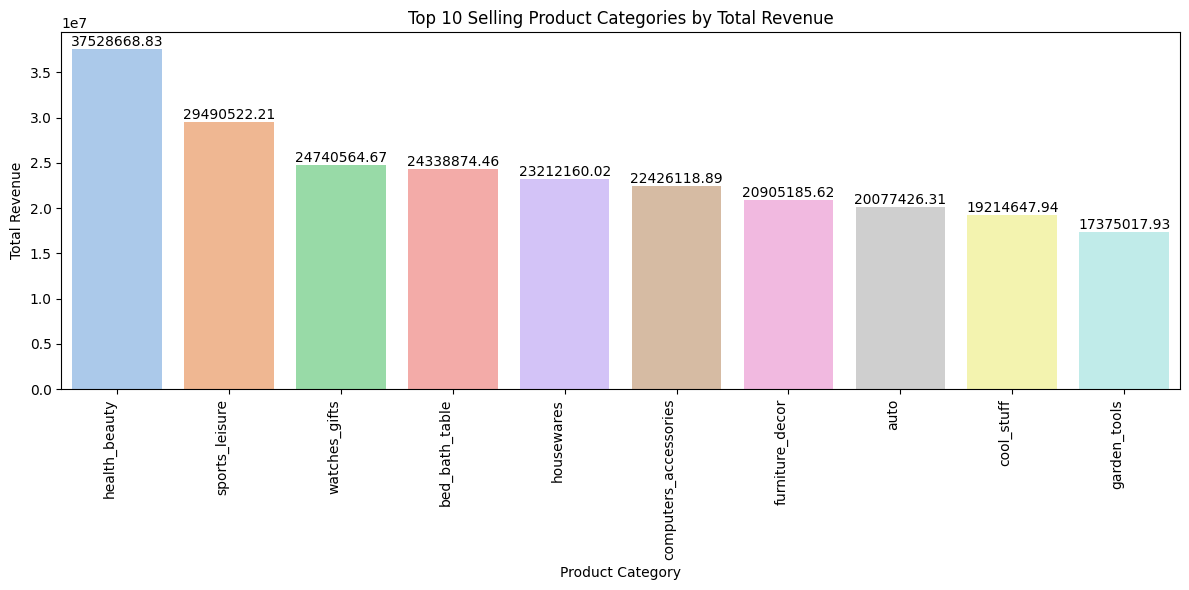

In [ ]:
# Group by product category and sum total revenue
revenue_by_category = all_data.groupby('product_category_name_english')['total_revenue'].sum().reset_index()

# Sort categories by total revenue in descending order
top_10_categories = revenue_by_category.sort_values(by='total_revenue', ascending=False).head(10)

plt.figure(figsize=(12, 6))
ax = sns.barplot(x='product_category_name_english', y='total_revenue', data=top_10_categories, palette="pastel")
plt.title('Top 10 Selling Product Categories by Total Revenue')
plt.xlabel('Product Category')
plt.ylabel('Total Revenue')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
# Add data labels on each bar manually
for container in ax.containers:
    for bar in container:
        ax.annotate(f'{bar.get_height():.2f}',
                    (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                    ha='center', va='bottom')
plt.show()

## 4. Customer Analysis


<b> A. Customers that have made repeat purchases on Olist, and  percentage of total sales </b>

Number of repeat customers: 2706
Percentage of repeat customers: 2.96%
Total revenue from repeat customers: 759915.24
Percentage of total sales from repeat customers: 5.62%


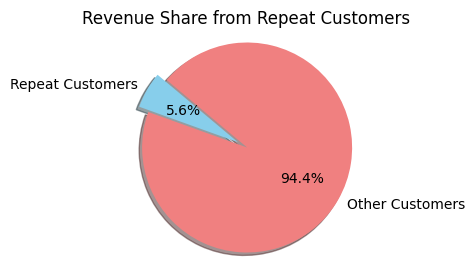

In [ ]:
# Calculate the number of unique customers
total_customers = all_data['customer_unique_id'].nunique()

# Filter out customers with only one purchase
repeat_customers = all_data.groupby('customer_unique_id')['order_id'].nunique()
repeat_customers = repeat_customers[repeat_customers > 1].index

# Count the number of repeat customers
num_repeat_customers = len(repeat_customers)

# Calculate the percentage of repeat customers
percentage_repeat_customers = (num_repeat_customers / total_customers) * 100

# Print the results
print(f"Number of repeat customers: {num_repeat_customers}")
print(f"Percentage of repeat customers: {percentage_repeat_customers:.2f}%")

# Calculate the total revenue from repeat customers
repeat_customer_revenue = all_data[all_data['customer_unique_id'].isin(repeat_customers)]['price'].sum()

# Calculate the total revenue from all customers
total_revenue = all_data['price'].sum()

# Calculate the percentage of total sales from repeat customers
percentage_repeat_revenue = (repeat_customer_revenue / total_revenue) * 100

# Print the results
print(f"Total revenue from repeat customers: {repeat_customer_revenue:.2f}")
print(f"Percentage of total sales from repeat customers: {percentage_repeat_revenue:.2f}%")

labels = ['Repeat Customers', 'Other Customers']
sizes = [repeat_customer_revenue, total_revenue - repeat_customer_revenue]
colors = ['skyblue', 'lightcoral']
explode = (0.1, 0)  # explode the 1st slice

# Create the pie chart
plt.figure(figsize=(5, 3))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Revenue Share from Repeat Customers')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

<b> B. Payment Method used by Customer </b>

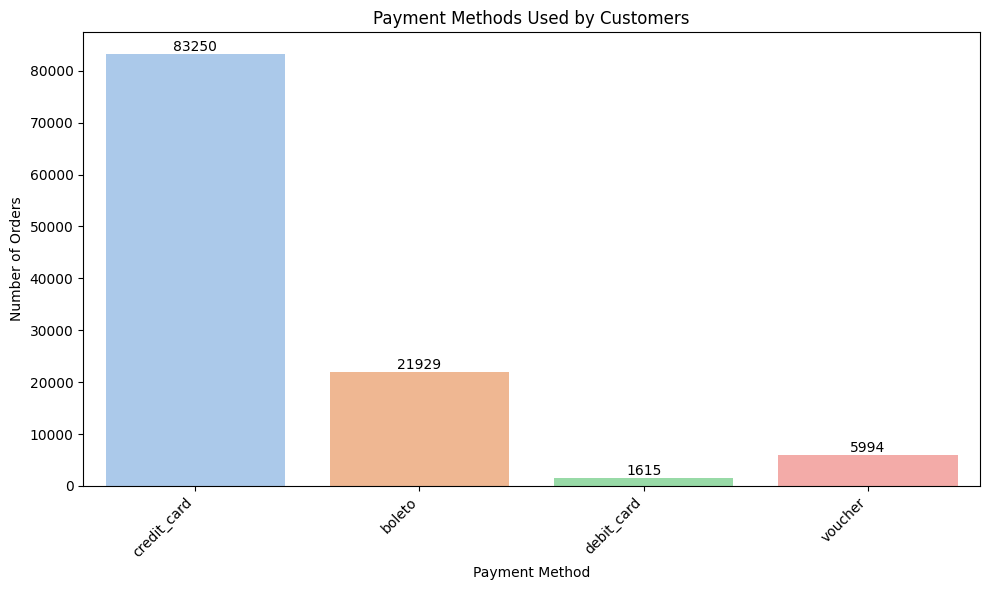

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='payment_type', data=all_data, palette="pastel")
plt.title('Payment Methods Used by Customers')
plt.xlabel('Payment Method')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45, ha='right')

# Add data labels on each bar
for bar in ax.containers:
    ax.bar_label(bar)

plt.tight_layout()
plt.show()

<b> C. New vs Repeat Customers </b>

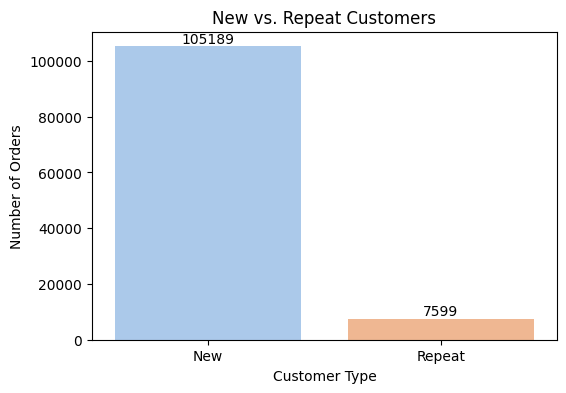

In [ ]:
# Group data by customer type and count orders
# Check if 'customer_unique_id' is the intended column to identify customer type
# Assuming a new customer has only one order_id associated with their customer_unique_id
all_data['customer_type'] = all_data.groupby('customer_unique_id')['order_id'].transform('nunique').apply(lambda x: 'Repeat' if x > 1 else 'New')
customer_type_counts = all_data.groupby('customer_type')['order_id'].count().reset_index()

# Plot
plt.figure(figsize=(6, 4))
ax = sns.barplot(x='customer_type', y='order_id', data=customer_type_counts, palette="pastel") # Changed y to 'order_unique_id'
plt.title('New vs. Repeat Customers')
plt.xlabel('Customer Type')
plt.ylabel('Number of Orders')

# Add data labels on each bar
for container in ax.containers:
    ax.bar_label(container)

plt.show()

## 4. Seller Analysis

**A. Total Sellers per Product Category**

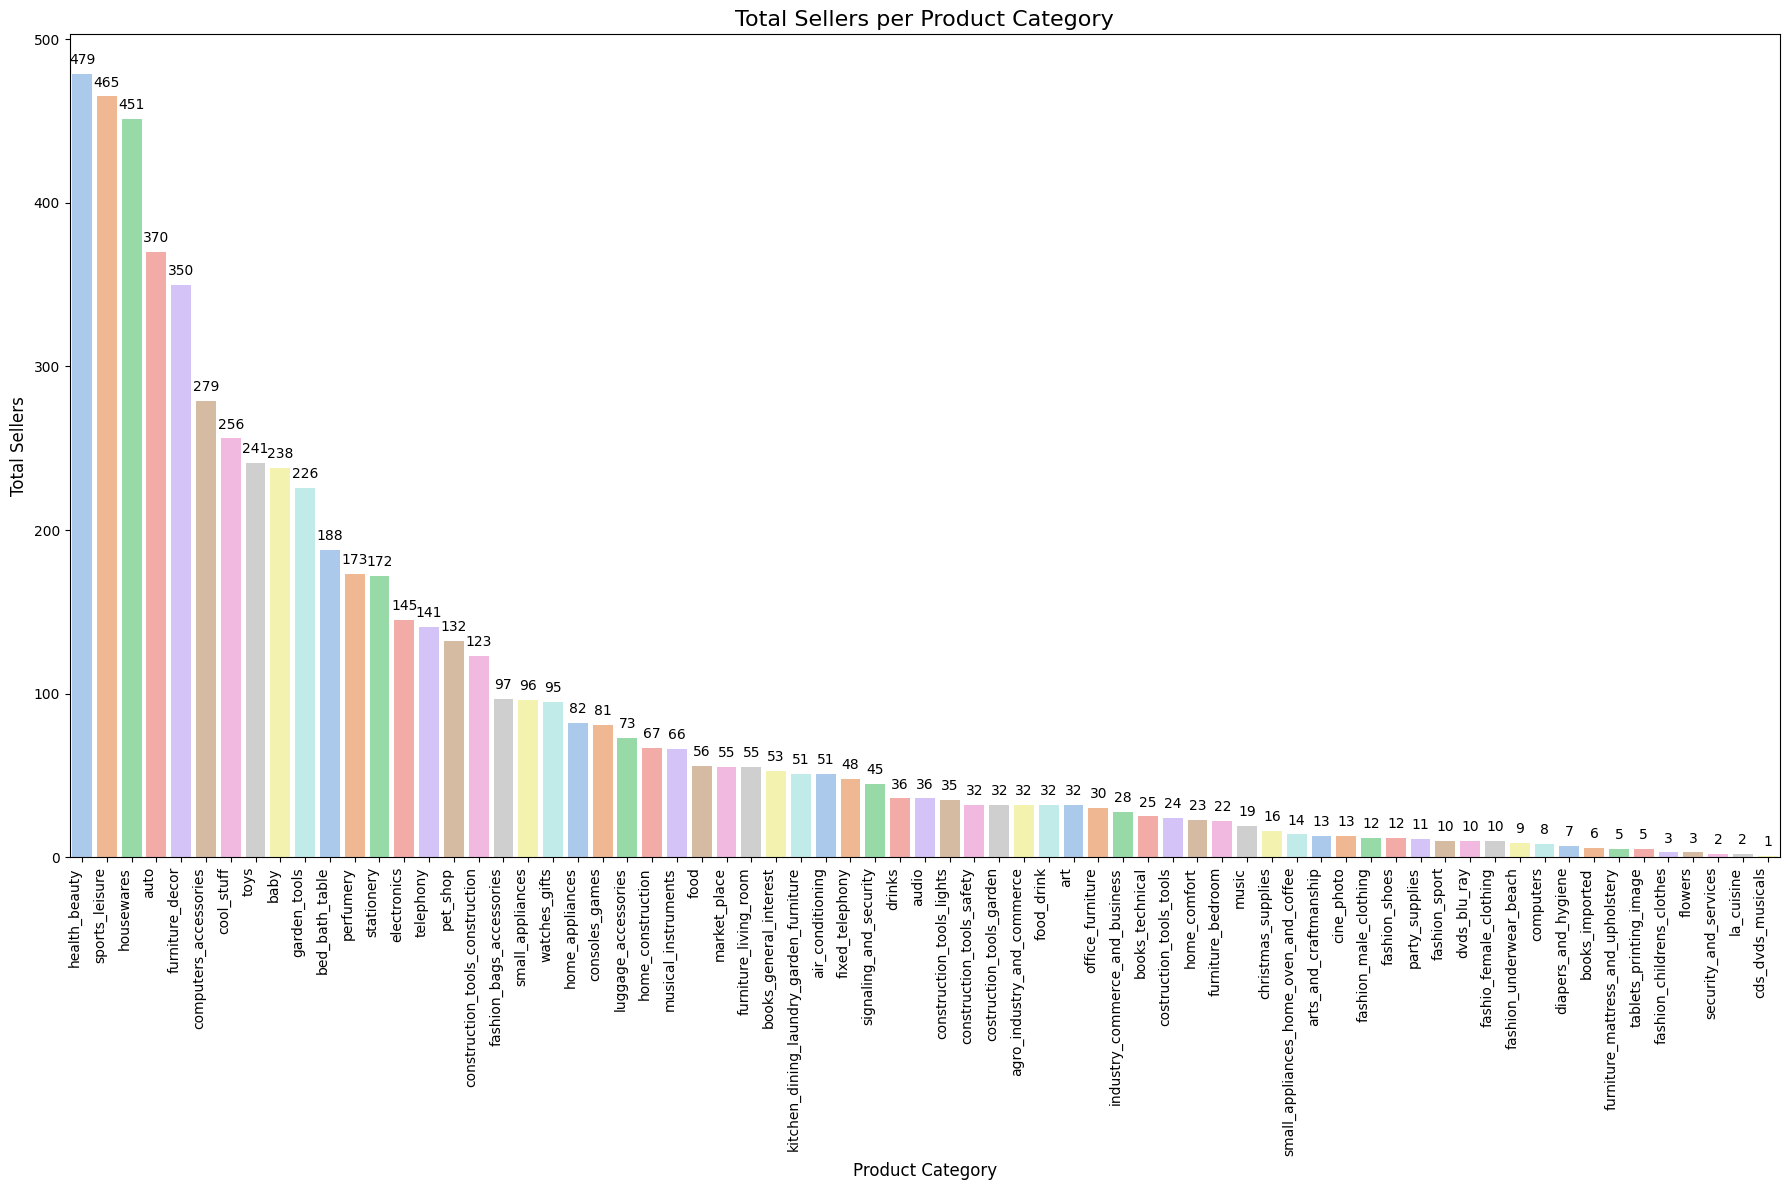

In [ ]:
sellers_per_category = all_data.groupby('product_category_name_english')['seller_id'].nunique().reset_index()
sellers_per_category.columns = ['Product Category', 'Total Sellers']
sellers_per_category = sellers_per_category.sort_values(by='Total Sellers', ascending=False)

# Visualization
plt.figure(figsize=(18, 12))  # Adjust figure size for better readability
ax = sns.barplot(x='Product Category', y='Total Sellers', data=sellers_per_category, palette='pastel')
plt.title('Total Sellers per Product Category', fontsize=16)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Total Sellers', fontsize=12)
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping

# Add data labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

**B. Active Sellers Over Time**

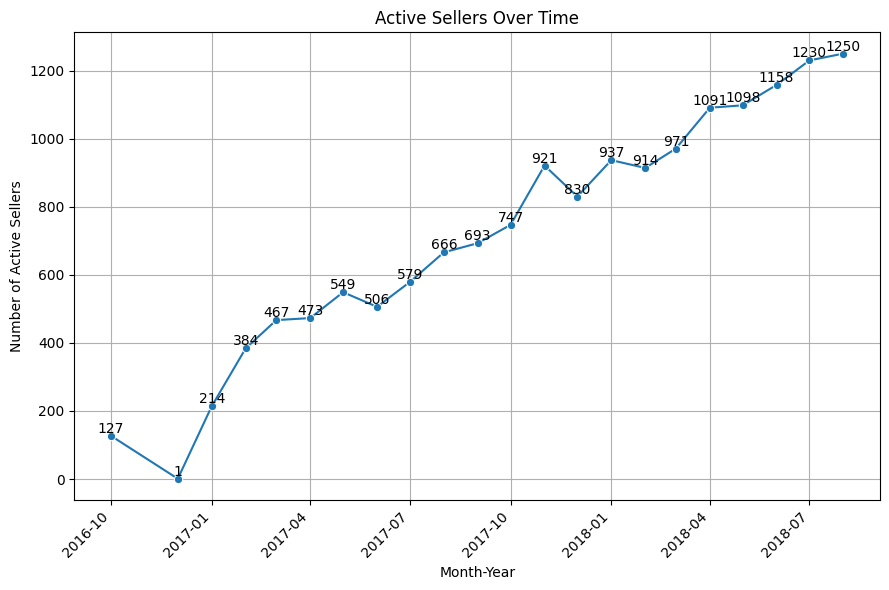

In [ ]:
# Group data by year-month and count unique sellers
sellers_over_time = all_data.groupby(all_data['order_purchase_timestamp'].dt.to_period('M'))['seller_id'].nunique().reset_index()

# Rename columns for clarity
sellers_over_time.columns = ['Month-Year', 'Active Sellers']

# Convert 'Month-Year' to datetime objects
sellers_over_time['Month-Year'] = sellers_over_time['Month-Year'].dt.to_timestamp()  # Convert Period to Timestamp

# Visualization
plt.figure(figsize=(9, 6))
ax = sns.lineplot(x='Month-Year', y='Active Sellers', data=sellers_over_time, marker='o')
plt.title('Active Sellers Over Time')
plt.xlabel('Month-Year')
plt.ylabel('Number of Active Sellers')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.grid(True)  # Add a grid for better visualization

# Add data labels
for x, y in zip(sellers_over_time['Month-Year'], sellers_over_time['Active Sellers']):
    ax.text(x, y, str(y), ha='center', va='bottom')  # Adjust ha, va as needed

plt.show()


**C. The distribution of seller ratings on Olist, its impact on sales performance**

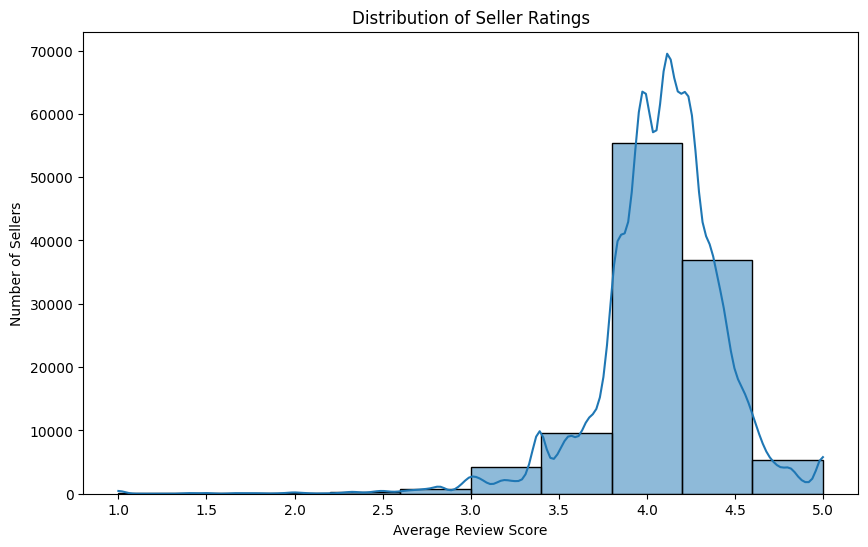

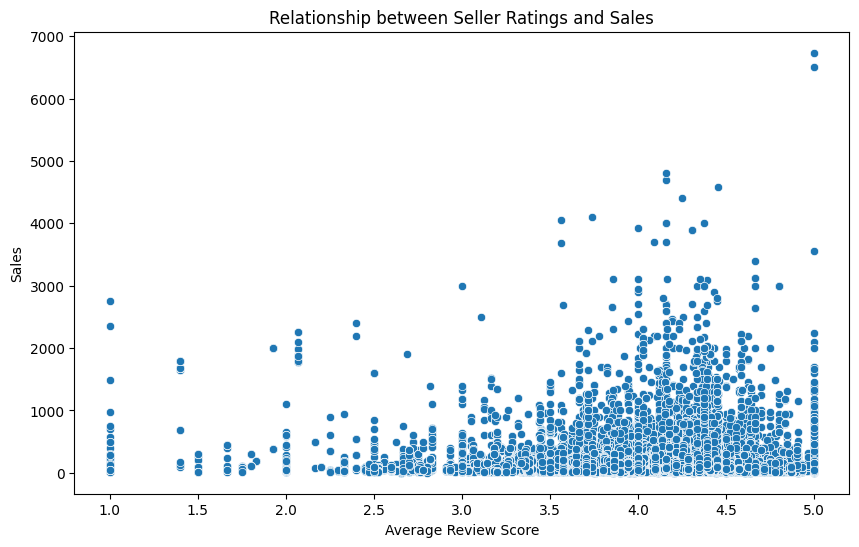

In [ ]:
# Distribution of seller ratings
plt.figure(figsize=(10, 6))
sns.histplot(all_data['avg_review_score'], bins=10, kde=True)
plt.title('Distribution of Seller Ratings')
plt.xlabel('Average Review Score')
plt.ylabel('Number of Sellers')
plt.show()

# Impact on sales performance
plt.figure(figsize=(10, 6))
sns.scatterplot(x='avg_review_score', y='price', data=all_data)
plt.title('Relationship between Seller Ratings and Sales')
plt.xlabel('Average Review Score')
plt.ylabel('Sales')
plt.show()

**D. The average order cancellation rate impact in seller performance**

Average order cancellation rate: 0.01%


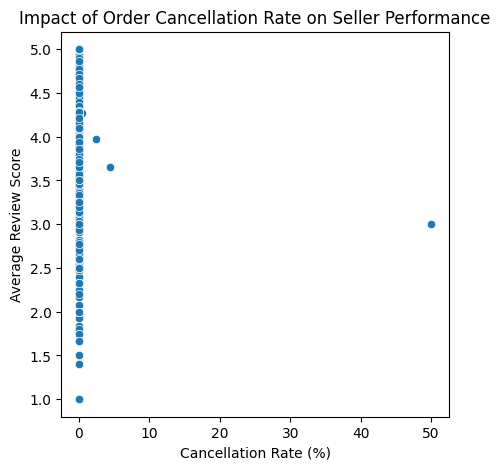

In [ ]:
# Calculate the total number of orders
total_orders = all_data['order_id'].nunique()

# Filter out canceled orders
canceled_orders = all_data[all_data['order_status'] == 'canceled']['order_id'].nunique()

# Calculate the average order cancellation rate
cancellation_rate = (canceled_orders / total_orders) * 100

# Print the result
print(f"Average order cancellation rate: {cancellation_rate:.2f}%")

# Group by seller ID and calculate cancellation rate for each seller
seller_cancellation_rates = all_data.groupby('seller_id')['order_status'].apply(lambda x: (x == 'canceled').sum() / len(x) * 100).reset_index()
seller_cancellation_rates.columns = ['seller_id', 'cancellation_rate']

# Merge with seller ratings
seller_performance = seller_cancellation_rates.merge(seller_ratings, on='seller_id', how='left')

# Visualization
plt.figure(figsize=(5, 5))
sns.scatterplot(x='cancellation_rate', y='avg_review_score', data=seller_performance)
plt.title('Impact of Order Cancellation Rate on Seller Performance')
plt.xlabel('Cancellation Rate (%)')
plt.ylabel('Average Review Score')
plt.show()

## 5. Review Analysis

**A. The total Review Score calculation from all customers**

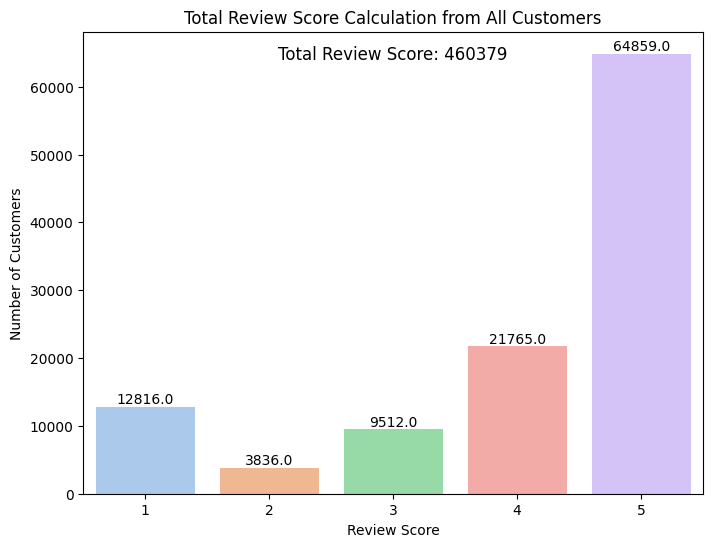

In [ ]:
# Calculate total review score for all customers
total_review_score = all_data['review_score'].sum()

# Create a bar plot
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='review_score', data=all_data, palette="pastel")
plt.title('Total Review Score Calculation from All Customers')
plt.xlabel('Review Score')
plt.ylabel('Number of Customers')

# Add total review score as text annotation
plt.text(0.5, 0.95, f'Total Review Score: {total_review_score}',
         horizontalalignment='center', verticalalignment='center',
         transform=plt.gca().transAxes, fontsize=12)

# Add data labels on each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 5),
                textcoords='offset points')

plt.show()


**B. Average Delivery Time vs Average Review Score**

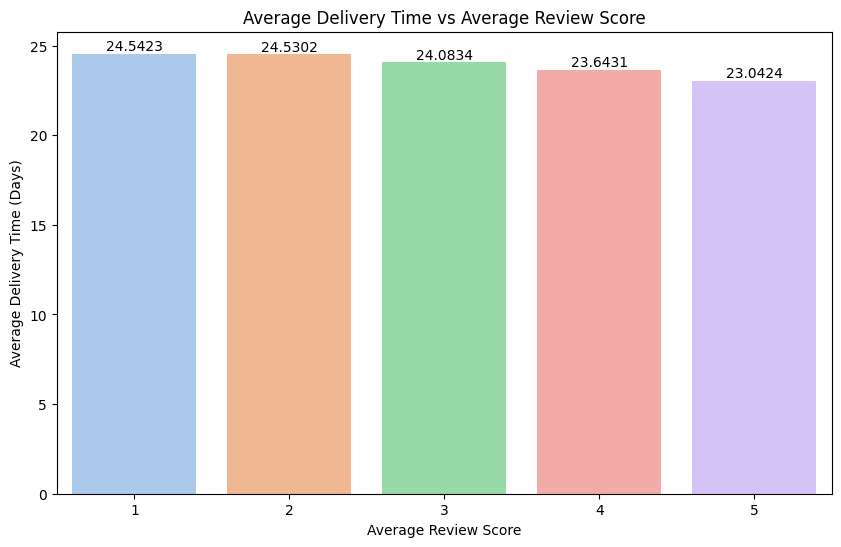

In [ ]:
# Calculate average delivery time
all_data['delivery_time'] = (all_data['order_estimated_delivery_date'] - all_data['order_purchase_timestamp']).dt.days

# Group by review score and calculate average delivery time
avg_delivery_by_review = all_data.groupby('review_score')['delivery_time'].mean().reset_index()

# Visualization
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='review_score', y='delivery_time', data=avg_delivery_by_review, palette="pastel") #add ax
plt.title('Average Delivery Time vs Average Review Score')
plt.xlabel('Average Review Score')
plt.ylabel('Average Delivery Time (Days)')

# Add data labels on each bar
for bar in ax.containers: #add this section
    ax.bar_label(bar)

plt.show()

## 6. RFM Analysis


**A. Recency, Frequency and Monetary Value**

In [ ]:
# RFM Analysis
rfm_df = all_data.groupby(by="customer_unique_id", as_index=False).agg({
    "order_purchase_timestamp": "max",  # mengambil tanggal order terakhir
    "order_id": "nunique",  # menghitung jumlah order
    "price": "sum"  # menghitung jumlah revenue yang dihasilkan
})
rfm_df.columns = ["customer_unique_id", "max_order_timestamp", "frequency", "monetary"]

# menghitung kapan terakhir pelanggan melakukan transaksi (hari)
rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
recent_date = all_data["order_purchase_timestamp"].dt.date.max()
# Access the 'days' attribute directly from the timedelta object
rfm_df["recency"] = (recent_date - rfm_df["max_order_timestamp"]).apply(lambda x: x.days)

rfm_df.sort_values(by="recency", ascending=False).head(5)

,customer_unique_id,max_order_timestamp,frequency,monetary,recency
66102,b8b8726af116a5cfb35b0315ecef9172,2016-10-03,1,21.50,695
6108,10e89fd8e5c745f81bec101207ba4d7d,2016-10-03,1,74.90,695
17011,2f64e403852e6893ae37485d5fcacdaf,2016-10-03,1,21.90,695
50376,8d3a54507421dbd2ce0a1d58046826e0,2016-10-03,1,119.90,695
48430,87776adb449c551e74c13fc34f036105,2016-10-03,1,29.99,695


**B. Sorting customers based on recency, frequency, and monetary score**

In [ ]:
rfm_df['r_rank'] = rfm_df['recency'].rank(ascending=False)
rfm_df['f_rank'] = rfm_df['frequency'].rank(ascending=True)
rfm_df['m_rank'] = rfm_df['monetary'].rank(ascending=True)

rfm_df.head()

,customer_unique_id,max_order_timestamp,frequency,monetary,recency,r_rank,f_rank,m_rank
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10,1,129.90,111,69276.0,44380.0,60966.5
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07,1,18.90,114,68323.0,44380.0,3892.0
2,0000f46a3911fa3c0805444483337064,2017-03-10,1,69.00,537,3126.5,44380.0,35513.5
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12,1,25.99,321,26010.5,44380.0,9001.5
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14,1,180.00,288,30610.5,44380.0,72734.5


In [ ]:
# normalizing the rank of the customers
rfm_df['r_rank_norm'] = (rfm_df['r_rank']/rfm_df['r_rank'].max())*100
rfm_df['f_rank_norm'] = (rfm_df['f_rank']/rfm_df['f_rank'].max())*100
rfm_df['m_rank_norm'] = (rfm_df['m_rank']/rfm_df['m_rank'].max())*100

rfm_df.drop(columns=['r_rank', 'f_rank', 'm_rank'], inplace=True)

rfm_df.head()

,customer_unique_id,max_order_timestamp,frequency,monetary,recency,r_rank_norm,f_rank_norm,m_rank_norm
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10,1,129.90,111,75.744588,48.521292,66.655551
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07,1,18.90,114,74.702602,48.521292,4.255180
2,0000f46a3911fa3c0805444483337064,2017-03-10,1,69.00,537,3.418434,48.521292,38.827420
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12,1,25.99,321,28.439208,48.521292,9.841469
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14,1,180.00,288,33.468729,48.521292,79.521675


In [ ]:
rfm_df['RFM_score'] = 0.15*rfm_df['r_rank_norm']+0.28 * \
    rfm_df['f_rank_norm']+0.57*rfm_df['m_rank_norm']
rfm_df['RFM_score'] *= 0.05
rfm_df = rfm_df.round(2)
rfm_df[['customer_unique_id', 'RFM_score']].head(7)

,customer_unique_id,RFM_score
0,0000366f3b9a7992bf8c76cfdf3221e2,3.15
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1.36
2,0000f46a3911fa3c0805444483337064,1.81
3,0000f6ccb0745a6a4b88665a16c9f078,1.17
4,0004aac84e0df4da2b147fca70cf8255,3.20
5,0004bd2a26a76fe21f786e4fbd80607f,3.29
6,00050ab1314c0e55a6ca13cf7181fecf,1.52


**B. Customer Segmentation Based on  RFM Score**

In [ ]:
rfm_df["customer_segment"] = np.where(
    rfm_df['RFM_score'] > 4.5, "Top customers", (np.where(
        rfm_df['RFM_score'] > 4, "High value customer",(np.where(
            rfm_df['RFM_score'] > 3, "Medium value customer", np.where(rfm_df['RFM_score'] > 1.6, 'Low value customers', 'lost customers'))))))

rfm_df[['customer_unique_id', 'RFM_score', 'customer_segment']].head(20)

,customer_unique_id,RFM_score,customer_segment
0,0000366f3b9a7992bf8c76cfdf3221e2,3.15,Medium value customer
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1.36,lost customers
2,0000f46a3911fa3c0805444483337064,1.81,Low value customers
3,0000f6ccb0745a6a4b88665a16c9f078,1.17,lost customers
4,0004aac84e0df4da2b147fca70cf8255,3.20,Medium value customer
5,0004bd2a26a76fe21f786e4fbd80607f,3.29,Medium value customer
6,00050ab1314c0e55a6ca13cf7181fecf,1.52,lost customers
7,00053a61a98854899e70ed204dd4bafe,3.78,Medium value customer
8,0005e1862207bf6ccc02e4228effd9a0,2.65,Low value customers
9,0005ef4cd20d2893f0d9fbd94d3c0d97,2.77,Low value customers


In [ ]:
customer_segment_df = rfm_df.groupby(by="customer_segment", as_index=False).customer_unique_id.nunique()
customer_segment_df

,customer_segment,customer_unique_id
0,High value customer,2436
1,Low value customers,44287
2,Medium value customer,26840
3,Top customers,472
4,lost customers,17430


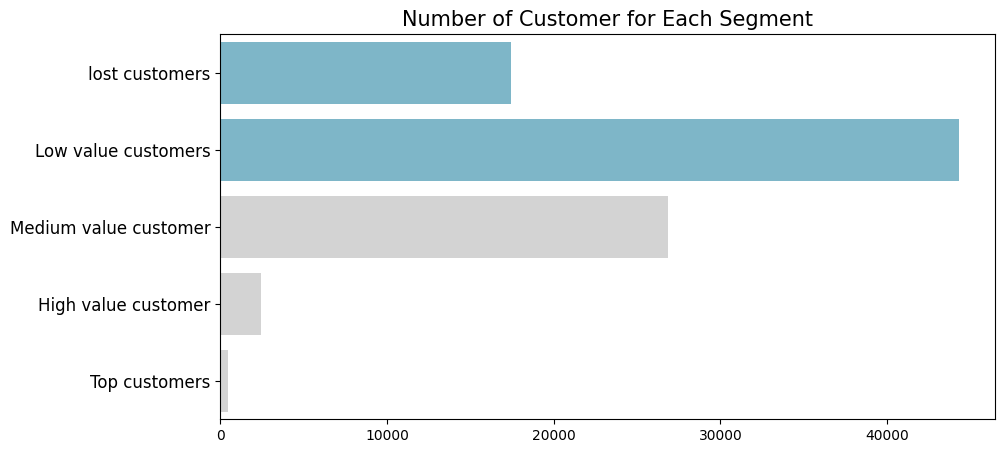

In [ ]:
customer_segment_df['customer_segment'] = pd.Categorical(customer_segment_df['customer_segment'], [
    "lost customers", "Low value customers", "Medium value customer",
    "High value customer", "Top customers"
])


plt.figure(figsize=(10, 5))
colors_ = ["#72BCD4", "#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(
    x="customer_unique_id",
    y="customer_segment",
    data=customer_segment_df.sort_values(by="customer_segment", ascending=False),
    palette=colors_
)
plt.title("Number of Customer for Each Segment", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()


## Conclusion

1. Kategori Produk Terpopuler dan Volume Penjualan:

Kategori produk bed_bath_table adalah yang paling populer, diikuti oleh health_beauty.
Produk rumah tangga dan kecantikan memiliki permintaan tinggi.
Kategori computer, furniture_decor, housewares, sports_leisure, watches_gifts, garden_tools, telephony, auto, dan toys juga memiliki penjualan yang signifikan, menunjukkan keragaman minat konsumen.
Kesimpulan: Olist perlu memastikan ketersediaan dan variasi produk dalam kategori populer untuk memenuhi permintaan. Strategi pemasaran dapat difokuskan pada kategori ini. Kategori dengan penjualan lebih rendah seperti auto dan toys dapat dievaluasi untuk potensi peningkatan.

2. Distribusi Peringkat Penjual dan Pengaruhnya terhadap Penjualan:

Ada korelasi positif antara peringkat penjual dan jumlah pesanan. Penjual dengan peringkat tinggi cenderung mendapatkan lebih banyak pesanan.
Meskipun demikian, beberapa penjual dengan peringkat rendah masih dapat mencapai penjualan yang tinggi, menunjukkan faktor lain di luar peringkat yang berperan.
Kesimpulan: Peringkat penjual merupakan faktor penting dalam kinerja penjualan. Olist perlu mendorong penjual untuk meningkatkan peringkat mereka melalui kualitas produk, layanan pelanggan, dan pengiriman yang baik. Faktor-faktor lain yang memengaruhi penjualan juga perlu diidentifikasi dan dioptimalkan.

3. Total Pendapatan Bulanan pada Tahun 2016, 2017, dan 2018:

Pendapatan Olist cenderung meningkat dari tahun ke tahun, dengan puncak penjualan di bulan November.
Terdapat fluktuasi pendapatan bulanan, yang mungkin dipengaruhi oleh faktor musiman dan promosi.
Kesimpulan: Olist perlu mempertimbangkan tren musiman dalam perencanaan bisnis dan strategi pemasaran. Promosi dan kampanye dapat dijadwalkan untuk memaksimalkan pendapatan selama periode puncak penjualan.

4. Bagaimana pengaruh tingkat pembatalan pesanan terhadap kinerja penjualan?

Rata-rata tingkat pembatalan pesanan Olist relatif rendah.
Tingkat pembatalan pesanan yang lebih tinggi cenderung dikaitkan dengan peringkat penjual yang lebih rendah.
Kesimpulan: Meminimalkan pembatalan pesanan penting untuk kinerja penjualan dan kepuasan pelanggan. Olist perlu mengidentifikasi dan mengatasi penyebab pembatalan pesanan, seperti masalah inventaris, pengiriman, atau kualitas produk.

Kesimpulan Umum:

Analisis data ini memberikan wawasan berharga tentang kinerja e-commerce Olist. Dengan memahami kategori produk populer, pengaruh peringkat penjual, tren pendapatan, dan faktor-faktor lain, Olist dapat mengoptimalkan strategi bisnis, meningkatkan penjualan, dan kepuasan pelanggan. Pemantauan dan analisis data secara berkala sangat penting untuk pengambilan keputusan yang tepat dan pertumbuhan bisnis yang berkelanjutan